In [2]:
!pip install wordcloud

In [3]:
!pip install textblob

In [4]:
# Basic
import pandas as pd
import numpy as np

# Stats models
from scipy import sparse
import scipy.stats as ss

# Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import string
import re
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import textblob
import xgboost

from textblob import TextBlob
from nltk.stem import PorterStemmer

In [5]:
data = pd.read_excel("Womens Clothing Reviews Data.xlsx")
data.head(5)

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   

   Customer Age             Review Title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   
3            50         My favorite buy!   
4            47         Flattering shirt   

                                         Review Text  Rating  Recommend Flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for this dress and reall...       3               0  
3  I love, love, love this jumpsuit. it's fun, fl...       5               1  
4  This shirt is very flattering to all due to th...       5               1

In [6]:
# Check for null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [7]:
# Rename the columns

data.columns = data.columns.str.replace(" ","_")

In [8]:
# Identify no. of null values in text column

data.Review_Text.isnull().sum()

845

In [9]:
data.Recommend_Flag.isnull().sum()

0

In [10]:
# Remove the columns where review_text is null 

data1 = data[data.Review_Text.isnull() == False]

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_ID      22641 non-null  int64 
 1   Category        22628 non-null  object
 2   Subcategory1    22628 non-null  object
 3   SubCategory2    22628 non-null  object
 4   Location        22641 non-null  object
 5   Channel         22641 non-null  object
 6   Customer_Age    22641 non-null  int64 
 7   Review_Title    19675 non-null  object
 8   Review_Text     22641 non-null  object
 9   Rating          22641 non-null  int64 
 10  Recommend_Flag  22641 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.1+ MB


In [12]:
# Drop the columns which are not useful for any analysis

data1.drop(["Product_ID", "Review_Title"], axis = 1, inplace = True)

C:\Users\saach\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        22628 non-null  object
 1   Subcategory1    22628 non-null  object
 2   SubCategory2    22628 non-null  object
 3   Location        22641 non-null  object
 4   Channel         22641 non-null  object
 5   Customer_Age    22641 non-null  int64 
 6   Review_Text     22641 non-null  object
 7   Rating          22641 non-null  int64 
 8   Recommend_Flag  22641 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


In [14]:
# Missing value Imputation

def missing_val(x):
    if x.dtype == "int":
        x = x.fillna(x.median())
    elif ((x.dtype == "object") or (x.dtype == "O")):
        x = x.fillna(x.mode().iloc[0])
    else:
        x
    
    return x    

In [15]:
data2 = data1.apply(missing_val)

In [16]:
# Outlier Treatment

def outlier_val(x):
    if x.dtype == "int":
        x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
        
    return x

In [17]:
data2 = data2.apply(outlier_val)

In [18]:
# Converting categorical data to numerical data
# Peform OnehotEncoding or LabelEncoding

data3  = pd.get_dummies(data = data2[["Category", "Subcategory1","Subcategory1", "Location", "Channel"]], drop_first = True)

In [19]:
data4 = pd.concat([data2, data3], axis = 1)

In [20]:
data5  = data4.iloc[:, 5: 26]

In [21]:
data5.isna().sum()

Customer_Age               0
Review_Text                0
Rating                     0
Recommend_Flag             0
Category_General Petite    0
Category_Initmates         0
Subcategory1_Dresses       0
Subcategory1_Intimate      0
Subcategory1_Jackets       0
Subcategory1_Tops          0
Subcategory1_Trend         0
Subcategory1_Dresses       0
Subcategory1_Intimate      0
Subcategory1_Jackets       0
Subcategory1_Tops          0
Subcategory1_Trend         0
Location_Chennai           0
Location_Gurgaon           0
Location_Mumbai            0
Channel_Web                0
dtype: int64

In [22]:
# Calculating sentiment  and polarity using lexican approach (dictionary approach)

blb = textblob.TextBlob(data5.Review_Text[0])

In [23]:
blb.polarity

0.6333333333333333

In [24]:
blb.sentiment

Sentiment(polarity=0.6333333333333333, subjectivity=0.9333333333333332)

In [25]:
# Calculating the sentiment score based on the polarity 

data5["Sentiment_Score"] = data5.Review_Text.apply(lambda x: TextBlob(x).lower().polarity)

In [26]:
data5["Sentiment"] = np.where(data5.Sentiment_Score >= 0.1, "Positive", np.where(data5.Sentiment_Score <= -0.1, "Negative", "Neutral"))

In [27]:
# Abbrevations and words corrections 

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = text.replace("\n", " ")
    # text = re.sub(r'+', ' ', text)
    text = re.sub(r"[-()#!@=~`:;+{}!,'0-9]", "", text)
    
    return(text)

In [28]:
data5["clean_text"] = data5.Review_Text.apply(clean_text)

In [29]:
STOPWORDS = list(STOPWORDS) # Convert from set to list

In [30]:
STOPWORDS

['had',
 "hadn't",
 'nor',
 'off',
 'further',
 "they'd",
 'would',
 "wouldn't",
 "it's",
 'being',
 "that's",
 'just',
 'if',
 'below',
 'he',
 'my',
 'or',
 'should',
 'when',
 'very',
 "she'll",
 'him',
 "when's",
 'against',
 'having',
 "i've",
 "we'll",
 "he'd",
 'here',
 "we've",
 'ours',
 "hasn't",
 "there's",
 'these',
 'through',
 'so',
 'myself',
 'same',
 'this',
 'otherwise',
 'also',
 'shall',
 'http',
 'ourselves',
 "shan't",
 'their',
 'me',
 'those',
 'hence',
 'other',
 'in',
 "wasn't",
 'as',
 'can',
 'could',
 "she'd",
 'who',
 'most',
 'cannot',
 "doesn't",
 'over',
 'because',
 'her',
 'on',
 'some',
 'since',
 'at',
 "we're",
 'www',
 'with',
 "aren't",
 'however',
 "he'll",
 'more',
 'how',
 'which',
 'by',
 'r',
 "you'll",
 'during',
 'they',
 'your',
 'own',
 'into',
 'is',
 'theirs',
 'she',
 'herself',
 'there',
 'why',
 'am',
 'out',
 "you're",
 'yours',
 'did',
 'been',
 'whom',
 'we',
 'only',
 "i'm",
 'between',
 'the',
 'doing',
 'has',
 'of',
 'an',
 'i

In [31]:
# Preprocessing of the text

#def pre_process(text):
    # text = text.apply(lambda x: " ".join(x for x in x.split() if x not in STOPWORDS))
 #   text = text.apply(lambda x: str(TextBlob.correct()))
    
     
  #  return text

#data5.clean_text.apply(pre_process)

In [32]:
# Stop words removal using NLTK

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stop_words = list(stopwords.words('english'))

In [36]:
word_tokens = data5.clean_text.apply(word_tokenize)
word_tokens

0        [absolutely, wonderful, silky, and, sexy, and,...
1        [love, this, dress, its, sooo, pretty, ., i, h...
2        [i, had, such, high, hopes, for, this, dress, ...
3        [i, love, love, love, this, jumpsuit, ., its, ...
4        [this, shirt, is, very, flattering, to, all, d...
                               ...                        
23481    [i, was, very, happy, to, snag, this, dress, a...
23482    [it, reminds, me, of, maternity, clothes, ., s...
23483    [this, fit, well, but, the, top, was, very, se...
23484    [i, bought, this, dress, for, a, wedding, i, h...
23485    [this, dress, in, a, lovely, platinum, is, fem...
Name: clean_text, Length: 22641, dtype: object

In [37]:
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence

[['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable'],
 ['love',
  'this',
  'dress',
  'its',
  'sooo',
  'pretty',
  '.',
  'i',
  'happened',
  'to',
  'find',
  'it',
  'in',
  'a',
  'store',
  'and',
  'im',
  'glad',
  'i',
  'did',
  'bc',
  'i',
  'never',
  'would',
  'have',
  'ordered',
  'it',
  'online',
  'bc',
  'its',
  'petite',
  '.',
  'i',
  'bought',
  'a',
  'petite',
  'and',
  'am',
  '``',
  '.',
  'i',
  'love',
  'the',
  'length',
  'on',
  'me',
  'hits',
  'just',
  'a',
  'little',
  'below',
  'the',
  'knee',
  '.',
  'would',
  'definitely',
  'be',
  'a',
  'true',
  'midi',
  'on',
  'someone',
  'who',
  'is',
  'truly',
  'petite',
  '.'],
 ['i',
  'had',
  'such',
  'high',
  'hopes',
  'for',
  'this',
  'dress',
  'and',
  'really',
  'wanted',
  'it',
  'to',
  'work',
  'for',
  'me',
  '.',
  'i',
  'initially',
  'ordered',
  'the',
  'petite',
  'small',
  'my',
  'usual',
  'size',
  'but',
  'i',
  'found',
  'this',

In [38]:
# Stemming words with NLTK

from nltk.stem import PorterStemmer

In [39]:
ps = PorterStemmer()

In [40]:
for w in word_tokens:
    print(w)

['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable']
['love', 'this', 'dress', 'its', 'sooo', 'pretty', '.', 'i', 'happened', 'to', 'find', 'it', 'in', 'a', 'store', 'and', 'im', 'glad', 'i', 'did', 'bc', 'i', 'never', 'would', 'have', 'ordered', 'it', 'online', 'bc', 'its', 'petite', '.', 'i', 'bought', 'a', 'petite', 'and', 'am', '``', '.', 'i', 'love', 'the', 'length', 'on', 'me', 'hits', 'just', 'a', 'little', 'below', 'the', 'knee', '.', 'would', 'definitely', 'be', 'a', 'true', 'midi', 'on', 'someone', 'who', 'is', 'truly', 'petite', '.']
['i', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me', '.', 'i', 'initially', 'ordered', 'the', 'petite', 'small', 'my', 'usual', 'size', 'but', 'i', 'found', 'this', 'to', 'be', 'outrageously', 'small', '.', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up', 'i', 'reordered', 'it', 'in', 'petite', 'medium', 'which', 'was', 'just', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['this', 'is', 'a', 'great', 'layering', 'tank', 'that', 'is', 'super', 'comfy', 'the', 'sale', 'price', 'is', 'a', 'bargain']
['effortless', 'and', 'super', 'cute', 'im', 'currently', 'wearing', 'my', 'blue', 'tunic', 'for', 'the', 'first', 'time', 'with', 'black', 'leggings', 'and', 'booties', 'i', 'absolutely', 'love', 'the', 'everyday', 'comfort', 'of', 'this', 'piece', 'a', 'few', 'have', 'mentioned', 'length', 'as', 'being', 'an', 'issue', 'im', 'wearing', 'a', 'regular', 's', 'my', 'normal', 'size', 'at', '``', 'and', 'find', 'the', 'length', 'similar', 'to', 'the', 'models', '.', 'the', 'cut', 'on', 'this', 'is', 'perfect', 'i', 'was', 'worried', 'that', 'it', 'would', 'look', 'like', 'a', 'plaid', 'sack', 'on', 'but', 'its', 'a', 'slim', 'cut', 'that', 'looks', 'polished', 'without', 'needing', 'to', 'be', 'belted', '.', 'this', 'will', 'surely', 'be', 'a', 'goto', 'for', 'me']
['i', 'like', 'this', 'top', 'a', 'lot', 'its', 'cuter', 'in', 'person', 'than', 'it', 'looks', 'on

In [41]:
# POS Tagging with NLTK

In [42]:
# NER with NLTK

In [43]:
# Lemmatizing with NLTK

In [44]:
# Calculating the sentiment score based on the polarity on the cleaned data

data5["Sentiment_Score"] = data5.clean_text.apply(lambda x: TextBlob(x).lower().polarity)

data5["Sentiment"] = np.where(data5.Sentiment_Score >= 0.1, "Positive", np.where(data5.Sentiment_Score <= -0.1, "Negative", "Neutral"))

In [45]:
# Classifying positive and negative reviews

positive_review = data5.clean_text[data5.Sentiment == "Positive"]
negative_review = data5.clean_text[data5.Sentiment == "Negative"]

In [46]:
# Positive Review Word Cloud

wordcloud = WordCloud(stopwords = STOPWORDS).generate("".join(positive_review.tolist()))


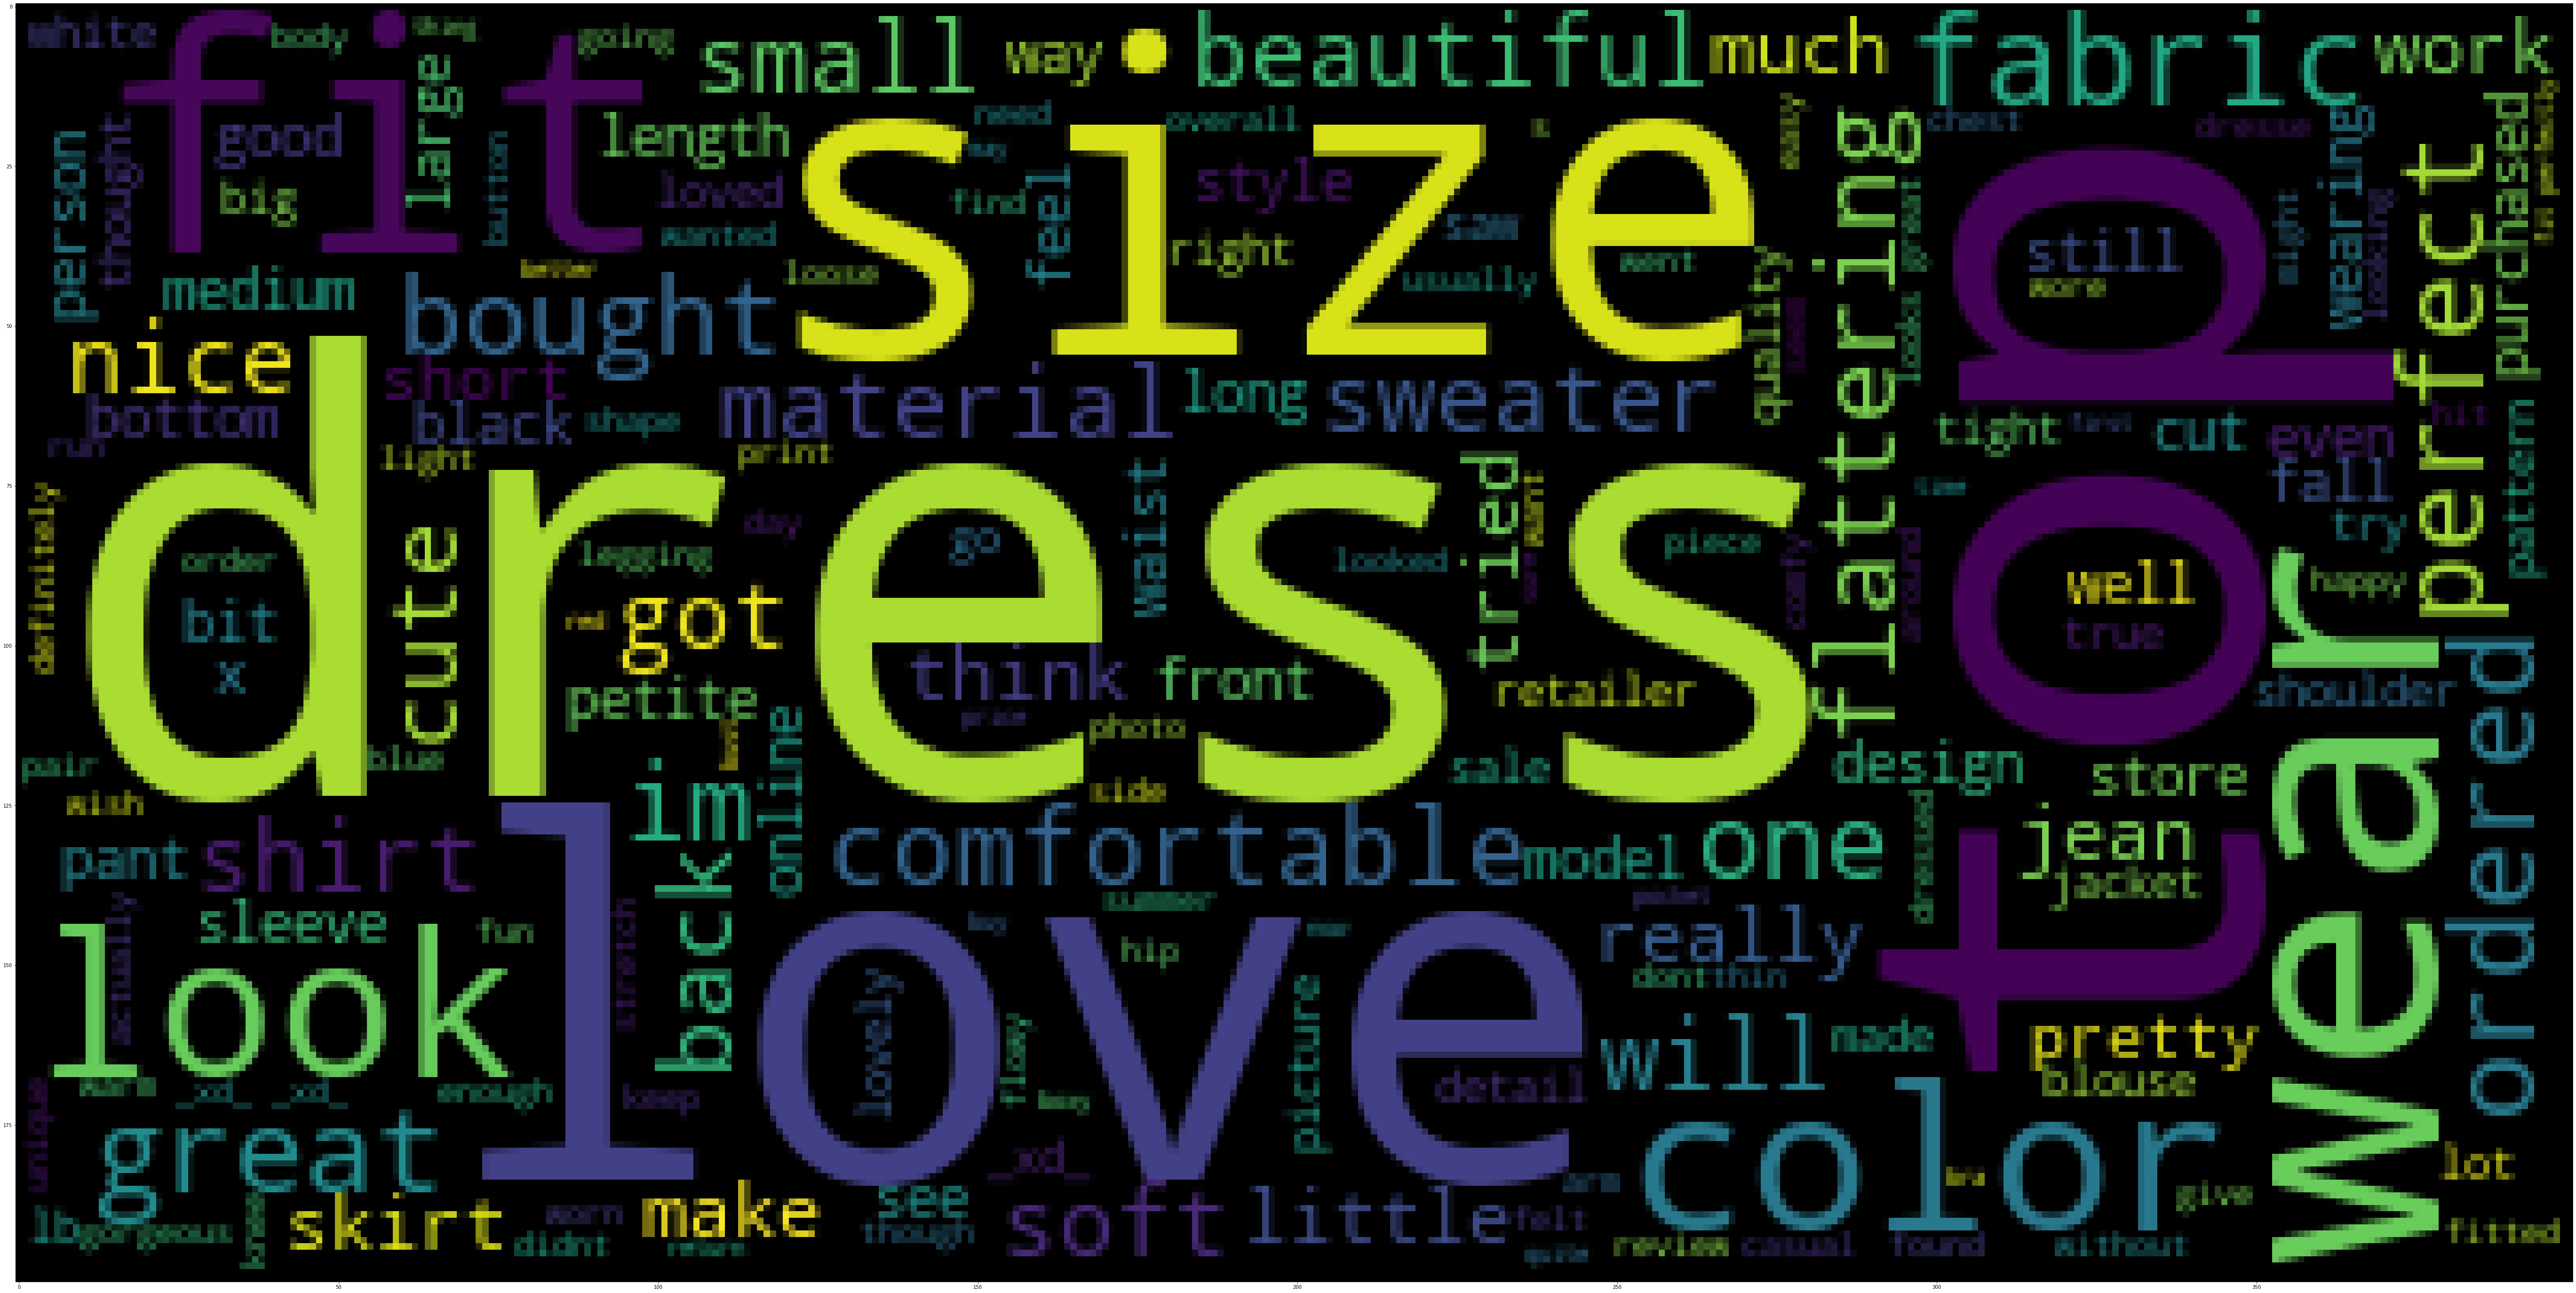

In [47]:
%matplotlib inline
fig = plt.figure(figsize = (200,50))
plt.imshow(wordcloud)

In [48]:
# Negative Review Word Cloud

wordcloud = WordCloud(stopwords = STOPWORDS).generate("".join(negative_review.tolist()))

STOPWORDS = list(STOPWORDS) + ["dress", "fabric","size", "dress", "look", "look"]

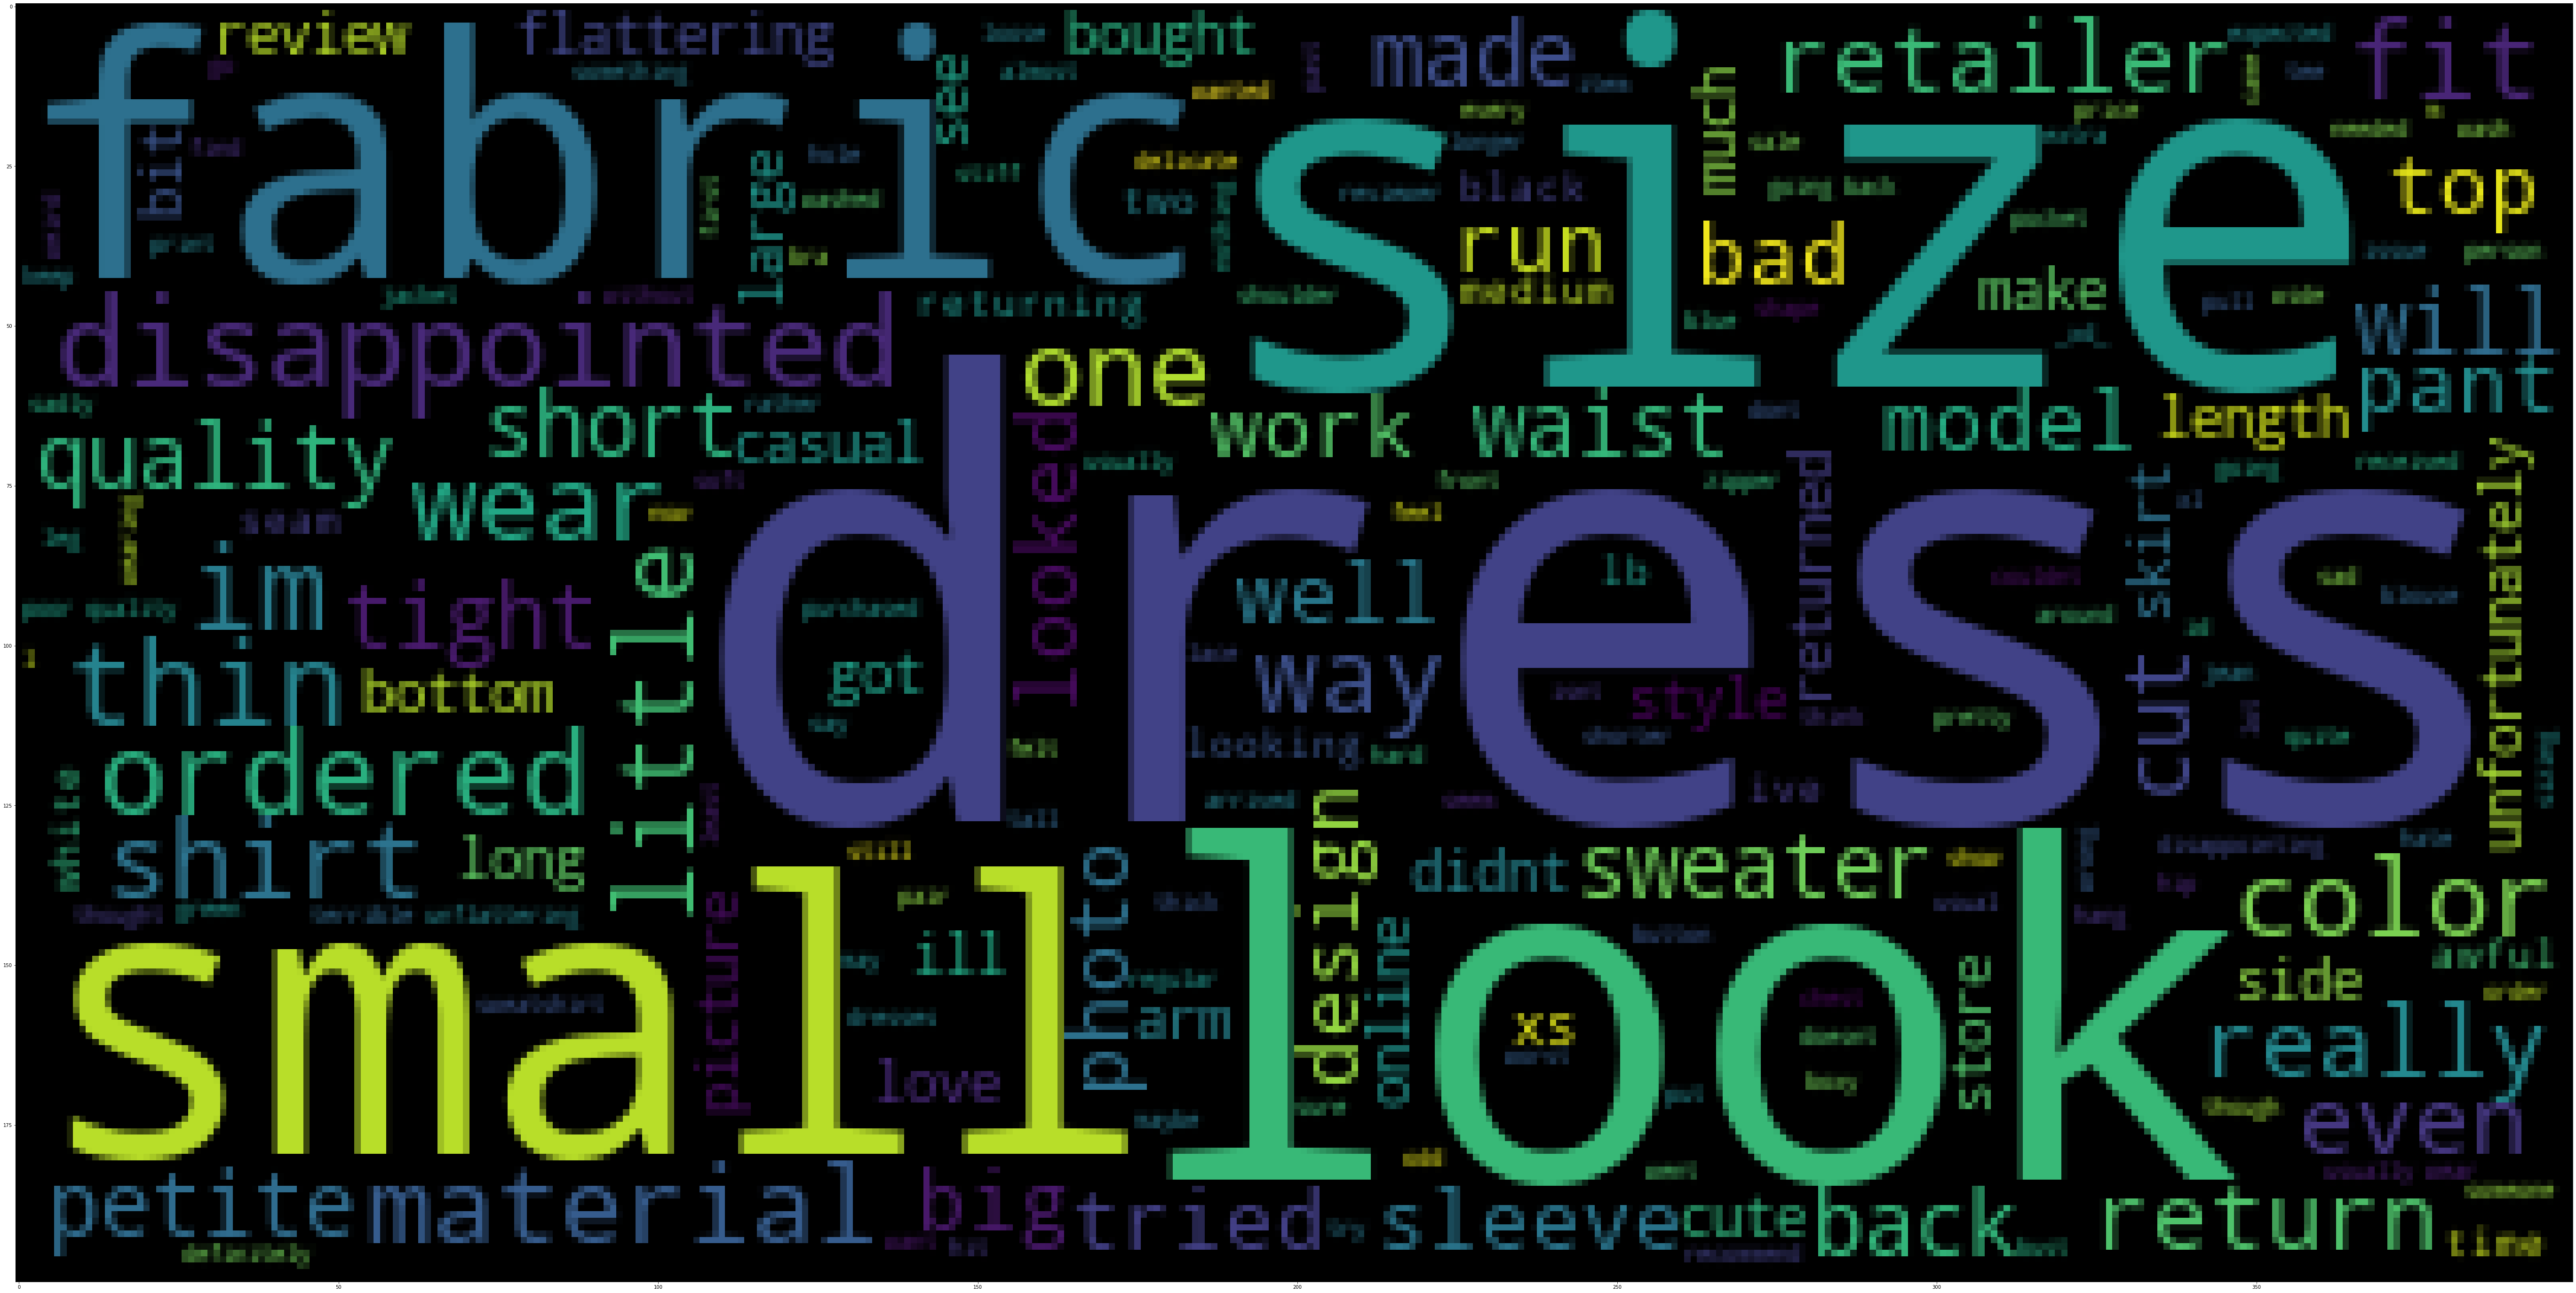

In [49]:
%matplotlib inline
fig = plt.figure(figsize = (200,50))
plt.imshow(wordcloud)

<AxesSubplot:ylabel='Sentiment'>

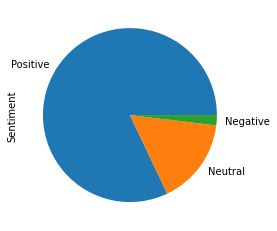

In [50]:
data5.Sentiment.value_counts().plot(kind = "pie")

In [51]:
data6 = data5.drop(["Review_Text", "Sentiment"], axis = 1)
data6.head(3)

Customer_Age  Rating  Recommend_Flag  Category_General Petite  \
0            33       4               1                        0   
1            34       5               1                        0   
2            60       3               0                        0   

   Category_Initmates  Subcategory1_Dresses  Subcategory1_Intimate  \
0                   1                     0                      1   
1                   0                     1                      0   
2                   0                     1                      0   

   Subcategory1_Jackets  Subcategory1_Tops  Subcategory1_Trend  ...  \
0                     0                  0                   0  ...   
1                     0                  0                   0  ...   
2                     0                  0                   0  ...   

   Subcategory1_Intimate  Subcategory1_Jackets  Subcategory1_Tops  \
0                      1                     0                  0   
1                      0                     0                  0   
2                      0                     0                  0   

   Subcategory1_Trend  Location_Chennai  Location_Gurgaon  Location_Mumbai  \
0                   0                 0                 0                1   
1                   0                 0                 0                0   
2                   0                 0                 1                0   

   Channel_Web  Sentiment_Score  \
0            0         0.633333   
1            0         0.318750   
2            0         0.076392   

                                          clean_text  
0  absolutely wonderful  silky and sexy and comfo...  
1  love this dress  its sooo pretty.  i happened ...  
2  i had such high hopes for this dress and reall...  

[3 rows x 21 columns]

In [52]:
data6.clean_text.isnull().sum()

0

In [53]:
# Applying vectorization

vect = TfidfVectorizer(analyzer = 'word', stop_words = STOPWORDS ,ngram_range = (1,1), min_df = 5, encoding = 'latin-1', lowercase = True, max_features = 1000)

In [54]:
vect.fit(data6.clean_text)

C:\Users\saach\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


TfidfVectorizer(encoding='latin-1', max_features=1000, min_df=5,
                stop_words=['had', "hadn't", 'nor', 'off', 'further', "they'd",
                            'would', "wouldn't", "it's", 'being', "that's",
                            'just', 'if', 'below', 'he', 'my', 'or', 'should',
                            'when', 'very', "she'll", 'him', "when's",
                            'against', 'having', "i've", "we'll", "he'd",
                            'here', "we've", ...])

In [55]:
vect.transform(data6.clean_text)

<22641x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 472336 stored elements in Compressed Sparse Row format>

In [56]:
dtm = vect.transform(data6.clean_text)

pd.DataFrame(dtm.toarray(), columns = vect.get_feature_names())

_xd_      able  absolutely  across  actually  add  added  addition  \
0       0.0  0.000000    0.385029     0.0       0.0  0.0    0.0       0.0   
1       0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
2       0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
3       0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
4       0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
...     ...       ...         ...     ...       ...  ...    ...       ...   
22636   0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
22637   0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
22638   0.0  0.322519    0.000000     0.0       0.0  0.0    0.0       0.0   
22639   0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
22640   0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   

       adds  adjustable  ...  year  years  yellow  yes  yesterday  yet  youll  \
0       0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
1       0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
2       0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
3       0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
4       0.0    0.388715  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
...     ...         ...  ...   ...    ...     ...  ...        ...  ...    ...   
22636   0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
22637   0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
22638   0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
22639   0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
22640   0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   

       youre       zip    zipper  
0        0.0  0.000000  0.000000  
1        0.0  0.000000  0.000000  
2        0.0  0.194621  0.171264  
3        0.0  0.000000  0.000000  
4        0.0  0.000000  0.000000  
...      ...       ...       ...  
22636    0.0  0.000000  0.000000  
22637    0.0  0.000000  0.000000  
22638    0.0  0.000000  0.000000  
22639    0.0  0.000000  0.000000  
22640    0.0  0.000000  0.000000  

[22641 rows x 1000 columns]

In [57]:
dtm_1 = pd.DataFrame(dtm.toarray(), columns = vect.get_feature_names())

In [58]:
data7 = data6.drop(["clean_text"], axis = 1)
data7.head(3)

Customer_Age  Rating  Recommend_Flag  Category_General Petite  \
0            33       4               1                        0   
1            34       5               1                        0   
2            60       3               0                        0   

   Category_Initmates  Subcategory1_Dresses  Subcategory1_Intimate  \
0                   1                     0                      1   
1                   0                     1                      0   
2                   0                     1                      0   

   Subcategory1_Jackets  Subcategory1_Tops  Subcategory1_Trend  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0                  0                   0   

   Subcategory1_Dresses  Subcategory1_Intimate  Subcategory1_Jackets  \
0                     0                      1                     0   
1                     1                      0                     0   
2                     1                      0                     0   

   Subcategory1_Tops  Subcategory1_Trend  Location_Chennai  Location_Gurgaon  \
0                  0                   0                 0                 0   
1                  0                   0                 0                 0   
2                  0                   0                 0                 1   

   Location_Mumbai  Channel_Web  Sentiment_Score  
0                1            0         0.633333  
1                0            0         0.318750  
2                0            0         0.076392

In [59]:
data7 = data7.reset_index()

In [60]:
dtm_1

_xd_      able  absolutely  across  actually  add  added  addition  \
0       0.0  0.000000    0.385029     0.0       0.0  0.0    0.0       0.0   
1       0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
2       0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
3       0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
4       0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
...     ...       ...         ...     ...       ...  ...    ...       ...   
22636   0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
22637   0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
22638   0.0  0.322519    0.000000     0.0       0.0  0.0    0.0       0.0   
22639   0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   
22640   0.0  0.000000    0.000000     0.0       0.0  0.0    0.0       0.0   

       adds  adjustable  ...  year  years  yellow  yes  yesterday  yet  youll  \
0       0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
1       0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
2       0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
3       0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
4       0.0    0.388715  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
...     ...         ...  ...   ...    ...     ...  ...        ...  ...    ...   
22636   0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
22637   0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
22638   0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
22639   0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   
22640   0.0    0.000000  ...   0.0    0.0     0.0  0.0        0.0  0.0    0.0   

       youre       zip    zipper  
0        0.0  0.000000  0.000000  
1        0.0  0.000000  0.000000  
2        0.0  0.194621  0.171264  
3        0.0  0.000000  0.000000  
4        0.0  0.000000  0.000000  
...      ...       ...       ...  
22636    0.0  0.000000  0.000000  
22637    0.0  0.000000  0.000000  
22638    0.0  0.000000  0.000000  
22639    0.0  0.000000  0.000000  
22640    0.0  0.000000  0.000000  

[22641 rows x 1000 columns]

In [61]:
data8 = pd.concat([data7,dtm_1], axis = 1)

In [62]:
data8.drop(["index"], axis = 1, inplace = True)

In [63]:
data8

Customer_Age  Rating  Recommend_Flag  Category_General Petite  \
0                33       4               1                        0   
1                34       5               1                        0   
2                60       3               0                        0   
3                50       5               1                        1   
4                47       5               1                        0   
...             ...     ...             ...                      ...   
22636            34       5               1                        1   
22637            48       3               1                        1   
22638            31       3               0                        1   
22639            28       3               1                        0   
22640            52       5               1                        1   

       Category_Initmates  Subcategory1_Dresses  Subcategory1_Intimate  \
0                       1                     0                      1   
1                       0                     1                      0   
2                       0                     1                      0   
3                       0                     0                      0   
4                       0                     0                      0   
...                   ...                   ...                    ...   
22636                   0                     1                      0   
22637                   0                     0                      0   
22638                   0                     1                      0   
22639                   0                     1                      0   
22640                   0                     1                      0   

       Subcategory1_Jackets  Subcategory1_Tops  Subcategory1_Trend  ...  year  \
0                         0                  0                   0  ...   0.0   
1                         0                  0                   0  ...   0.0   
2                         0                  0                   0  ...   0.0   
3                         0                  0                   0  ...   0.0   
4                         0                  1                   0  ...   0.0   
...                     ...                ...                 ...  ...   ...   
22636                     0                  0                   0  ...   0.0   
22637                     0                  1                   0  ...   0.0   
22638                     0                  0                   0  ...   0.0   
22639                     0                  0                   0  ...   0.0   
22640                     0                  0                   0  ...   0.0   

       years  yellow  yes  yesterday  yet  youll  youre       zip    zipper  
0        0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
1        0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
2        0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.194621  0.171264  
3        0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
4        0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
...      ...     ...  ...        ...  ...    ...    ...       ...       ...  
22636    0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
22637    0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
22638    0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
22639    0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
22640    0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  

[22641 rows x 1020 columns]

In [64]:
data8.Recommend_Flag.value_counts()

# The data is unbalanced

1    18540
0     4101
Name: Recommend_Flag, dtype: int64

In [65]:
# Splitting the data into train and test

X = data8.drop(["Recommend_Flag"], axis = 1)
Y = data8.Recommend_Flag

In [66]:
# the data is unbalanced. Balancing the data using SMOTE

import imblearn.over_sampling as over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

In [67]:
X, Y = sm.fit_resample(X.values, Y.values)

In [68]:
pd.DataFrame(Y).value_counts()

0    18540
1    18540
dtype: int64

In [69]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [70]:
#Applying the model - Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(max_depth = 20, max_features = 50)

In [73]:
rf.fit(train_X, train_Y)

RandomForestClassifier(max_depth=20, max_features=50)

In [74]:
pred_train_X = rf.predict(train_X)

In [75]:
print(metrics.classification_report(train_Y, pred_train_X))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12885
           1       0.99      0.97      0.98     13071

    accuracy                           0.98     25956
   macro avg       0.98      0.98      0.98     25956
weighted avg       0.98      0.98      0.98     25956



In [76]:
pred_test_X = rf.predict(test_X)

In [77]:
print(metrics.classification_report(test_Y, pred_test_X))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5655
           1       0.99      0.93      0.96      5469

    accuracy                           0.96     11124
   macro avg       0.96      0.96      0.96     11124
weighted avg       0.96      0.96      0.96     11124



In [78]:
# Applying the model - Support Vector Machine

In [79]:
from sklearn.svm import LinearSVC

In [80]:
lsvc_model = LinearSVC(C=1.0)

In [81]:
lsvc_model.fit(train_X, train_Y)

C:\Users\saach\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [82]:
pred_train_X = lsvc_model.predict(train_X)

In [83]:
print(metrics.classification_report(train_Y, pred_train_X))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     12885
           1       0.98      0.94      0.96     13071

    accuracy                           0.96     25956
   macro avg       0.96      0.96      0.96     25956
weighted avg       0.96      0.96      0.96     25956



In [84]:
pred_test_X = lsvc_model.predict(test_X)

In [85]:
print(metrics.classification_report(test_Y, pred_test_X))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5655
           1       0.97      0.93      0.95      5469

    accuracy                           0.95     11124
   macro avg       0.95      0.95      0.95     11124
weighted avg       0.95      0.95      0.95     11124



In [86]:
# Identify the drivers of the customers who are recommending the products 

# PCA

In [87]:
from sklearn.decomposition import PCA

In [88]:
data9 = data8.drop(columns = ["Recommend_Flag"], axis = 1)
data9

Customer_Age  Rating  Category_General Petite  Category_Initmates  \
0                33       4                        0                   1   
1                34       5                        0                   0   
2                60       3                        0                   0   
3                50       5                        1                   0   
4                47       5                        0                   0   
...             ...     ...                      ...                 ...   
22636            34       5                        1                   0   
22637            48       3                        1                   0   
22638            31       3                        1                   0   
22639            28       3                        0                   0   
22640            52       5                        1                   0   

       Subcategory1_Dresses  Subcategory1_Intimate  Subcategory1_Jackets  \
0                         0                      1                     0   
1                         1                      0                     0   
2                         1                      0                     0   
3                         0                      0                     0   
4                         0                      0                     0   
...                     ...                    ...                   ...   
22636                     1                      0                     0   
22637                     0                      0                     0   
22638                     1                      0                     0   
22639                     1                      0                     0   
22640                     1                      0                     0   

       Subcategory1_Tops  Subcategory1_Trend  Subcategory1_Dresses  ...  year  \
0                      0                   0                     0  ...   0.0   
1                      0                   0                     1  ...   0.0   
2                      0                   0                     1  ...   0.0   
3                      0                   0                     0  ...   0.0   
4                      1                   0                     0  ...   0.0   
...                  ...                 ...                   ...  ...   ...   
22636                  0                   0                     1  ...   0.0   
22637                  1                   0                     0  ...   0.0   
22638                  0                   0                     1  ...   0.0   
22639                  0                   0                     1  ...   0.0   
22640                  0                   0                     1  ...   0.0   

       years  yellow  yes  yesterday  yet  youll  youre       zip    zipper  
0        0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
1        0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
2        0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.194621  0.171264  
3        0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
4        0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
...      ...     ...  ...        ...  ...    ...    ...       ...       ...  
22636    0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
22637    0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
22638    0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
22639    0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  
22640    0.0     0.0  0.0        0.0  0.0    0.0    0.0  0.000000  0.000000  

[22641 rows x 1019 columns]

In [89]:
# Principal Component Analysis
# No. of components = No. of features = 1019

pc = PCA(n_components = 1019)
pc = pc.fit(data9)

In [90]:
pc.explained_variance_

array([1.51959607e+02, 1.25129667e+00, 6.92107369e-01, ...,
       1.02820312e-30, 5.05596239e-33, 1.69923326e-33])

In [91]:
pc.explained_variance_ratio_

array([9.71788466e-01, 8.00209804e-03, 4.42605751e-03, ...,
       6.57540486e-33, 3.23331051e-35, 1.08666726e-35])

In [92]:
# components contribute to 75% of the variance.

pd.Series(np.cumsum(pc.explained_variance_ratio_)*100).head(5)

0    97.178847
1    97.979056
2    98.421662
3    98.637441
4    98.827208
dtype: float64

In [93]:
# Re-applying the PCA

pc = PCA(n_components = 5)
pc = pc.fit(data9)

pcs = pc.transform(data9)

In [94]:
pcs = pd.DataFrame(pcs, columns = ['PCA_'+str(i) for i in range(1,6)])
pcs

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5
0     -10.284227  0.086197  0.277348  0.825653  1.524058
1      -9.283230 -0.846335  1.061285  0.054375 -0.251094
2      16.711008  1.243336  1.203647 -0.679194 -0.133647
3       6.720346 -0.835072  0.287353  0.113968  0.056146
4       3.725613 -0.800157 -0.865466  0.068357 -0.058949
...          ...       ...       ...       ...       ...
22636  -9.282736 -0.856495  1.096413 -0.713465 -0.645154
22637   4.720642  1.219962 -0.800111 -0.687324 -0.407945
22638 -12.288488  1.143977  1.098515 -0.689865 -0.620283
22639 -15.288703  1.148446  1.057711 -0.667582 -0.185389
22640   8.716552 -0.808024  1.171925  0.063709 -0.668691

[22641 rows x 5 columns]

In [95]:
Load = pd.DataFrame((pc.components_.T*np.sqrt(pc.explained_variance_)).T, columns = data9.columns).T
Load

0         1         2         3         4
Customer_Age             12.326979  0.003007  0.003983  0.000014  0.000581
Rating                    0.033705 -1.115094 -0.006163 -0.002924 -0.011556
Category_General Petite   0.003367 -0.004134  0.026454 -0.012966 -0.237982
Category_Initmates       -0.010186 -0.007556  0.024017  0.012332  0.180612
Subcategory1_Dresses     -0.024376  0.011083  0.365865 -0.011523 -0.201476
...                            ...       ...       ...       ...       ...
yet                       0.000531 -0.001740 -0.000135  0.000017  0.000350
youll                     0.000030 -0.000254  0.000043 -0.000019  0.000094
youre                    -0.000484  0.000048  0.000246  0.000188  0.000387
zip                      -0.000114  0.000321  0.001391 -0.000092 -0.000027
zipper                   -0.000425  0.001679  0.002260 -0.000287 -0.000634

[1019 rows x 5 columns]

In [96]:
Load.columns= ['PC1','PC2','PC3','PC4','PC5']
Load

PC1       PC2       PC3       PC4       PC5
Customer_Age             12.326979  0.003007  0.003983  0.000014  0.000581
Rating                    0.033705 -1.115094 -0.006163 -0.002924 -0.011556
Category_General Petite   0.003367 -0.004134  0.026454 -0.012966 -0.237982
Category_Initmates       -0.010186 -0.007556  0.024017  0.012332  0.180612
Subcategory1_Dresses     -0.024376  0.011083  0.365865 -0.011523 -0.201476
...                            ...       ...       ...       ...       ...
yet                       0.000531 -0.001740 -0.000135  0.000017  0.000350
youll                     0.000030 -0.000254  0.000043 -0.000019  0.000094
youre                    -0.000484  0.000048  0.000246  0.000188  0.000387
zip                      -0.000114  0.000321  0.001391 -0.000092 -0.000027
zipper                   -0.000425  0.001679  0.002260 -0.000287 -0.000634

[1019 rows x 5 columns]

In [97]:
Load.T.columns

Index(['Customer_Age', 'Rating', 'Category_General Petite',
       'Category_Initmates', 'Subcategory1_Dresses', 'Subcategory1_Intimate',
       'Subcategory1_Jackets', 'Subcategory1_Tops', 'Subcategory1_Trend',
       'Subcategory1_Dresses',
       ...
       'year', 'years', 'yellow', 'yes', 'yesterday', 'yet', 'youll', 'youre',
       'zip', 'zipper'],
      dtype='object', length=1019)

In [98]:
# List of the important features

final_list = ['Customer_Age', 'Rating', 'Category_General Petite',
       'Category_Initmates', 'Subcategory1_Dresses', 'Subcategory1_Intimate']

In [99]:
data10 = data9[final_list]
data10

Customer_Age  Rating  Category_General Petite  Category_Initmates  \
0                33       4                        0                   1   
1                34       5                        0                   0   
2                60       3                        0                   0   
3                50       5                        1                   0   
4                47       5                        0                   0   
...             ...     ...                      ...                 ...   
22636            34       5                        1                   0   
22637            48       3                        1                   0   
22638            31       3                        1                   0   
22639            28       3                        0                   0   
22640            52       5                        1                   0   

       Subcategory1_Dresses  Subcategory1_Dresses  Subcategory1_Intimate  \
0                         0                     0                      1   
1                         1                     1                      0   
2                         1                     1                      0   
3                         0                     0                      0   
4                         0                     0                      0   
...                     ...                   ...                    ...   
22636                     1                     1                      0   
22637                     0                     0                      0   
22638                     1                     1                      0   
22639                     1                     1                      0   
22640                     1                     1                      0   

       Subcategory1_Intimate  
0                          1  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
22636                      0  
22637                      0  
22638                      0  
22639                      0  
22640                      0  

[22641 rows x 8 columns]

# Topic Mining

In [100]:
doc_complete = list(data5.clean_text)
doc_complete

['absolutely wonderful  silky and sexy and comfortable',
 'love this dress  its sooo pretty.  i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite.  i bought a petite and am ".  i love the length on me hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small my usual size but i found this to be outrageously small. so small in fact that i could not zip it up i reordered it in petite medium which was just ok. overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers. imo a major design flaw was the net over layer sewn directly into the zipper  it c',
 'i love love love this jumpsuit. its fun flirty and fabulous every time i wear it i get nothing but great compliments',
 'this shirt is very flatter

In [101]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation) # can use regex
lemma = WordNetLemmatizer()

In [102]:
def clean(doc):
    # tokenization
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    # stop words
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    # Lemmatization
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    
    return normalised

In [103]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saach\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [104]:
doc_clean = [clean(doc).split() for doc in doc_complete]

In [105]:
[clean(doc) for doc in doc_complete]

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
 'high hope dress really wanted work me initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
 'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt',
 'love tracy reese dress one petite foot tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work 

In [106]:
big_list = []
    
for lists in doc_clean:
    big_list += lists
big_list = set(big_list)

print(big_list)

{'pricebut', 'pieced', 'putwhich', 'following', 'earrin', 'flowswing', 'damaged', 'sonot', 'detailxd', 'birkenstocks', 'shining', 'predicted', 'exampl', 'dresscould', 'wooly', 'cough', 'bohoglam', 'romperjumpsuits', 'clue', 'widel', 'unzip', 'training', 'myselfi', 'lookinghowever', 'midseptember', 'cranny', 'purplishplum', 'puzzling', 'wellboring', 'passedxd', 'speaks', 'becoming', 'indra', 'thingsdepending', 'buck', 'bressay', 'autumnal', 'partly', 'dealxd', 'dressesskirts', 'heavyhot', 'prowl', 'embroid', 'poundsluckily', 'coupled', 'tailor', 'similarly', 'verdugo', 'wornused', 'ombre', 'atrociously', 'houndstoothlike', 'reworked', 'steam', 'nonsense', 'posting', 'largehuge', 'tallest', 'thisjust', 'youwow', 'comfotable', 'stickthin', 'swimmingly', 'nightie', 'mashing', 'alinefairly', 'fabricstretches', 'billowly', 'spacek', 'jar', 'critter', 'adjacent', 'smokey', 'cover', 'funas', 'wheatley', 'slinkiness', 'slipper', 'sexyconservative', 'excels', 'cushion', 'pacifica', 'ideasoft', '

In [112]:
# import genism

!pip install gensim

In [113]:
import gensim

In [114]:
from gensim import corpora

In [115]:
# creating the term dictionary of our corpus, where every unique term is assigned an index

dictionary = corpora.Dictionary(doc_clean)

In [116]:
print(dictionary)

Dictionary(17587 unique tokens: ['absolutely', 'comfortable', 'sexy', 'silky', 'wonderful']...)


In [117]:
print(doc_clean)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [118]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

# (word index, frequenct of word in that document)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2)],
 [(1, 1),
  (8, 1),
  (21, 1),
  (22, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 3),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 3),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1)],
 [(17, 3),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(15, 1),
  (17, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (8

In [122]:
# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel

In [123]:
# Running and Training LDA model on the document term matrix
# n topics
# n words per topic

ldamodel = Lda(doc_term_matrix, num_topics = 4, id2word = dictionary, passes = 1)

In [124]:
for i in range(0,4):
    print("Topic", i)
    print(ldamodel.print_topic(i))
    print("------------------------")
    
#  w0 w1 w2 w3
# k0
# k1
# k2

#  k0 k1 k2 k3
# d1
# d2
# d3

Topic 0
0.038*"dress" + 0.018*"love" + 0.016*"wear" + 0.015*"great" + 0.015*"fit" + 0.011*"perfect" + 0.011*"color" + 0.009*"im" + 0.009*"bought" + 0.008*"comfortable"
------------------------
Topic 1
0.026*"sweater" + 0.025*"love" + 0.014*"look" + 0.013*"like" + 0.013*"soft" + 0.012*"color" + 0.011*"great" + 0.011*"nice" + 0.009*"top" + 0.009*"sleeve"
------------------------
Topic 2
0.022*"size" + 0.018*"dress" + 0.017*"top" + 0.017*"fit" + 0.014*"like" + 0.012*"small" + 0.011*"im" + 0.011*"look" + 0.011*"would" + 0.009*"ordered"
------------------------
Topic 3
0.022*"pant" + 0.020*"jean" + 0.017*"fit" + 0.017*"love" + 0.013*"color" + 0.012*"pair" + 0.012*"great" + 0.012*"size" + 0.009*"like" + 0.009*"look"
------------------------


In [125]:
# printing the topic associations with the documents

count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc :", count, i)
    
    count+=1

doc : 0 [(0, 0.8709184), (1, 0.042827215), (2, 0.04248315), (3, 0.043771237)]
doc : 1 [(2, 0.9741626)]
doc : 2 [(2, 0.7838788), (3, 0.20539658)]
doc : 3 [(0, 0.94705534), (1, 0.017566666), (2, 0.017339101), (3, 0.018038906)]
doc : 4 [(0, 0.66832113), (1, 0.23636444), (2, 0.015316311), (3, 0.07999815)]
doc : 5 [(1, 0.35802782), (2, 0.6292577)]
doc : 6 [(2, 0.80501455), (3, 0.1828769)]
doc : 7 [(2, 0.59207463), (3, 0.3975012)]
doc : 8 [(0, 0.015114992), (1, 0.14630331), (2, 0.8240745), (3, 0.014507157)]
doc : 9 [(0, 0.22329359), (2, 0.76257086)]
doc : 10 [(2, 0.9755973)]
doc : 11 [(0, 0.8426462), (1, 0.05222355), (2, 0.053713474), (3, 0.051416848)]
doc : 12 [(0, 0.07955307), (2, 0.799808), (3, 0.113349065)]
doc : 13 [(0, 0.41792828), (2, 0.56757665)]
doc : 14 [(0, 0.06996278), (2, 0.9185824)]
doc : 15 [(2, 0.9295728), (3, 0.058454376)]
doc : 16 [(2, 0.69095874), (3, 0.2934586)]
doc : 17 [(0, 0.3369069), (2, 0.35242316), (3, 0.30261984)]
doc : 18 [(0, 0.053460322), (1, 0.44285598), (2, 0.

doc : 395 [(0, 0.6867912), (2, 0.29823077)]
doc : 396 [(0, 0.3813871), (2, 0.6044854)]
doc : 397 [(0, 0.011461283), (1, 0.2237349), (2, 0.38190746), (3, 0.3828964)]
doc : 398 [(0, 0.017584985), (1, 0.94676393), (2, 0.017402144), (3, 0.018248942)]
doc : 399 [(0, 0.28254408), (2, 0.70605534)]
doc : 400 [(0, 0.17426516), (1, 0.069727555), (2, 0.56380475), (3, 0.19220254)]
doc : 401 [(0, 0.33342385), (1, 0.011037522), (2, 0.64524966), (3, 0.0102889165)]
doc : 402 [(0, 0.01630757), (1, 0.016591556), (2, 0.21577865), (3, 0.7513222)]
doc : 403 [(2, 0.98032504)]
doc : 404 [(0, 0.1463006), (1, 0.011318095), (2, 0.73830456), (3, 0.104076795)]
doc : 405 [(0, 0.014970685), (1, 0.0154043725), (2, 0.9541827), (3, 0.015442287)]
doc : 406 [(0, 0.27570072), (1, 0.06501583), (2, 0.6534781)]
doc : 407 [(2, 0.9827321)]
doc : 408 [(0, 0.39257425), (2, 0.59037054)]
doc : 409 [(2, 0.98023605)]
doc : 410 [(0, 0.2664086), (1, 0.7090602), (2, 0.012303712), (3, 0.01222748)]
doc : 411 [(0, 0.014150365), (1, 0.013

doc : 826 [(0, 0.026428897), (1, 0.9212578), (2, 0.026357716), (3, 0.025955645)]
doc : 827 [(0, 0.010316669), (1, 0.09747529), (2, 0.7758263), (3, 0.11638175)]
doc : 828 [(0, 0.27797017), (1, 0.707977)]
doc : 829 [(1, 0.72670233), (3, 0.25688514)]
doc : 830 [(0, 0.35188535), (1, 0.48124507), (3, 0.15805815)]
doc : 831 [(1, 0.30904895), (2, 0.67896163)]
doc : 832 [(2, 0.727786), (3, 0.25896734)]
doc : 833 [(0, 0.029619595), (1, 0.9109604), (2, 0.029130675), (3, 0.030289289)]
doc : 834 [(0, 0.2558793), (1, 0.01320496), (2, 0.7174375), (3, 0.013478248)]
doc : 835 [(2, 0.8794459), (3, 0.10266495)]
doc : 836 [(1, 0.010198022), (2, 0.97015804)]
doc : 837 [(1, 0.6942951), (2, 0.2895214)]
doc : 838 [(2, 0.9686438), (3, 0.019456023)]
doc : 839 [(0, 0.015957223), (1, 0.24887127), (2, 0.71851104), (3, 0.016660511)]
doc : 840 [(0, 0.35947663), (3, 0.6269763)]
doc : 841 [(0, 0.34621397), (2, 0.5413466), (3, 0.10667434)]
doc : 842 [(1, 0.14324488), (2, 0.34275368), (3, 0.50877345)]
doc : 843 [(0, 0.

doc : 1235 [(2, 0.4021723), (3, 0.5839367)]
doc : 1236 [(0, 0.030086366), (1, 0.67170227), (2, 0.2690273), (3, 0.029184066)]
doc : 1237 [(0, 0.66452545), (2, 0.3233117)]
doc : 1238 [(2, 0.7610886), (3, 0.22427703)]
doc : 1239 [(0, 0.12495252), (1, 0.16362838), (2, 0.42674246), (3, 0.28467664)]
doc : 1240 [(1, 0.23609026), (2, 0.7524478)]
doc : 1241 [(0, 0.59043676), (2, 0.39650866)]
doc : 1242 [(2, 0.975723)]
doc : 1243 [(0, 0.02130224), (1, 0.51008004), (2, 0.44740352), (3, 0.02121421)]
doc : 1244 [(2, 0.97867346)]
doc : 1245 [(2, 0.9819974)]
doc : 1246 [(0, 0.014745793), (1, 0.75176966), (2, 0.21843994), (3, 0.015044596)]
doc : 1247 [(1, 0.40827328), (2, 0.57577574)]
doc : 1248 [(0, 0.98369044)]
doc : 1249 [(0, 0.83908045), (1, 0.013623651), (2, 0.13411991), (3, 0.013175989)]
doc : 1250 [(2, 0.9832347)]
doc : 1251 [(2, 0.8259348), (3, 0.16211137)]
doc : 1252 [(0, 0.6839592), (2, 0.3006378)]
doc : 1253 [(2, 0.4308808), (3, 0.55849034)]
doc : 1254 [(0, 0.91913044), (1, 0.026010726), (2

doc : 1659 [(1, 0.024018371), (2, 0.96566683)]
doc : 1660 [(0, 0.011361819), (1, 0.48413342), (2, 0.49351346), (3, 0.010991265)]
doc : 1661 [(0, 0.3894578), (1, 0.012802666), (2, 0.585071), (3, 0.012668547)]
doc : 1662 [(0, 0.14615569), (2, 0.6151779), (3, 0.23087832)]
doc : 1663 [(0, 0.030745266), (1, 0.90700406), (2, 0.031545255), (3, 0.030705381)]
doc : 1664 [(0, 0.5068707), (1, 0.011828794), (2, 0.011234255), (3, 0.47006628)]
doc : 1665 [(0, 0.06423865), (2, 0.92393893)]
doc : 1666 [(2, 0.6817448), (3, 0.30853784)]
doc : 1667 [(0, 0.3483679), (1, 0.1707733), (2, 0.47504613)]
doc : 1668 [(0, 0.27884576), (1, 0.011017029), (2, 0.5452095), (3, 0.16492769)]
doc : 1669 [(0, 0.3337991), (2, 0.21645357), (3, 0.4434095)]
doc : 1670 [(0, 0.90131545), (1, 0.034066767), (2, 0.032311983), (3, 0.03230576)]
doc : 1671 [(2, 0.9824376)]
doc : 1672 [(0, 0.013954188), (1, 0.12857832), (2, 0.25881517), (3, 0.59865236)]
doc : 1673 [(0, 0.010229026), (1, 0.010248251), (2, 0.32031253), (3, 0.6592102)]
d

doc : 2065 [(0, 0.2834474), (1, 0.64585394), (2, 0.035157282), (3, 0.035541352)]
doc : 2066 [(0, 0.94325286), (1, 0.01914691), (2, 0.018720517), (3, 0.018879686)]
doc : 2067 [(2, 0.9759803)]
doc : 2068 [(0, 0.011496668), (1, 0.011825592), (2, 0.9650233), (3, 0.0116544645)]
doc : 2069 [(0, 0.32475254), (1, 0.010560356), (2, 0.65441924), (3, 0.010267885)]
doc : 2070 [(0, 0.2970787), (1, 0.011680362), (2, 0.6798311), (3, 0.011409807)]
doc : 2071 [(0, 0.3211912), (1, 0.65067655), (2, 0.013716067), (3, 0.014416263)]
doc : 2072 [(0, 0.3250473), (2, 0.6589515)]
doc : 2073 [(2, 0.98030704)]
doc : 2074 [(0, 0.5106166), (3, 0.47202247)]
doc : 2075 [(0, 0.2539464), (1, 0.0108654555), (2, 0.20765854), (3, 0.5275296)]
doc : 2076 [(0, 0.93394065), (1, 0.022534037), (2, 0.02175253), (3, 0.021772763)]
doc : 2077 [(0, 0.26802024), (1, 0.36307016), (3, 0.35983887)]
doc : 2078 [(0, 0.06433667), (1, 0.15384376), (2, 0.35878825), (3, 0.4230313)]
doc : 2079 [(0, 0.7570312), (1, 0.01778612), (2, 0.20749429),

doc : 2475 [(0, 0.010571615), (1, 0.107674226), (2, 0.87188965)]
doc : 2476 [(0, 0.7630705), (2, 0.22369936)]
doc : 2477 [(2, 0.98279834)]
doc : 2478 [(0, 0.25649756), (2, 0.73220813)]
doc : 2479 [(2, 0.81617093), (3, 0.17293175)]
doc : 2480 [(2, 0.97612405)]
doc : 2481 [(0, 0.21834251), (2, 0.37214938), (3, 0.4027188)]
doc : 2482 [(1, 0.7210557), (2, 0.26740447)]
doc : 2483 [(0, 0.925958), (1, 0.02505062), (2, 0.024562515), (3, 0.024428891)]
doc : 2484 [(0, 0.072491), (1, 0.13327643), (2, 0.7878742)]
doc : 2485 [(0, 0.98131275)]
doc : 2486 [(0, 0.42183542), (2, 0.34312925), (3, 0.22892538)]
doc : 2487 [(0, 0.053426363), (1, 0.23831019), (2, 0.468644), (3, 0.23961945)]
doc : 2488 [(0, 0.011318824), (1, 0.01117773), (2, 0.96620506), (3, 0.011298338)]
doc : 2489 [(0, 0.3504542), (3, 0.63143307)]
doc : 2490 [(0, 0.44474795), (2, 0.44784555), (3, 0.10041015)]
doc : 2491 [(0, 0.7497239), (1, 0.010085784), (2, 0.23014016), (3, 0.0100501375)]
doc : 2492 [(2, 0.98198235)]
doc : 2493 [(2, 0.981

doc : 2868 [(2, 0.97655547)]
doc : 2869 [(0, 0.34426343), (2, 0.6368668)]
doc : 2870 [(1, 0.16808894), (2, 0.8222374)]
doc : 2871 [(0, 0.96212095), (1, 0.012358315), (2, 0.012492309), (3, 0.013028364)]
doc : 2872 [(1, 0.12135617), (2, 0.86033535)]
doc : 2873 [(0, 0.32562906), (1, 0.15614776), (2, 0.5105101)]
doc : 2874 [(0, 0.124765545), (1, 0.8644331)]
doc : 2875 [(0, 0.063480005), (2, 0.9235418)]
doc : 2876 [(0, 0.8205787), (1, 0.16240507)]
doc : 2877 [(0, 0.29689607), (2, 0.68453044)]
doc : 2878 [(0, 0.7363206), (1, 0.0914938), (2, 0.085859634), (3, 0.08632601)]
doc : 2879 [(0, 0.7924628), (2, 0.1954542)]
doc : 2880 [(0, 0.08670639), (1, 0.15396401), (2, 0.7516278)]
doc : 2881 [(0, 0.36605224), (1, 0.62151)]
doc : 2882 [(0, 0.4667599), (1, 0.44109634), (2, 0.086807825)]
doc : 2883 [(0, 0.54199666), (2, 0.2705978), (3, 0.18114038)]
doc : 2884 [(0, 0.47401714), (1, 0.013793139), (2, 0.014313269), (3, 0.49787644)]
doc : 2885 [(0, 0.39835614), (1, 0.014666815), (2, 0.014408288), (3, 0.5

doc : 3222 [(0, 0.28917283), (1, 0.020900907), (2, 0.021073658), (3, 0.6688526)]
doc : 3223 [(0, 0.29866195), (1, 0.018310344), (2, 0.6653228), (3, 0.01770495)]
doc : 3224 [(1, 0.46633348), (2, 0.07589506), (3, 0.45157468)]
doc : 3225 [(0, 0.60775393), (2, 0.3759878)]
doc : 3226 [(0, 0.6914381), (1, 0.019081196), (2, 0.27014315), (3, 0.019337565)]
doc : 3227 [(2, 0.9731215)]
doc : 3228 [(0, 0.032136824), (1, 0.03292133), (2, 0.9024747), (3, 0.032467112)]
doc : 3229 [(0, 0.5723945), (2, 0.41348794)]
doc : 3230 [(0, 0.14827968), (1, 0.12761988), (2, 0.71559125)]
doc : 3231 [(0, 0.9295768), (1, 0.023909755), (2, 0.023101026), (3, 0.023412358)]
doc : 3232 [(0, 0.18904023), (2, 0.4416568), (3, 0.35959065)]
doc : 3233 [(0, 0.03980274), (2, 0.94883317)]
doc : 3234 [(0, 0.78328884), (1, 0.19815625)]
doc : 3235 [(2, 0.97509885)]
doc : 3236 [(0, 0.1856908), (1, 0.06893536), (2, 0.73931265)]
doc : 3237 [(0, 0.016577965), (1, 0.309425), (2, 0.017944582), (3, 0.6560525)]
doc : 3238 [(1, 0.32787865)

doc : 3610 [(0, 0.47023642), (2, 0.5149534)]
doc : 3611 [(0, 0.3491591), (1, 0.056067172), (2, 0.58738095)]
doc : 3612 [(0, 0.014283592), (1, 0.061400644), (2, 0.6029497), (3, 0.32136604)]
doc : 3613 [(0, 0.91406316), (1, 0.02838712), (2, 0.029116565), (3, 0.028433137)]
doc : 3614 [(0, 0.65468365), (2, 0.24925895), (3, 0.0901968)]
doc : 3615 [(0, 0.59962726), (1, 0.015724435), (2, 0.36930707), (3, 0.015341221)]
doc : 3616 [(0, 0.14603405), (2, 0.8426734)]
doc : 3617 [(0, 0.5363365), (2, 0.44906807)]
doc : 3618 [(0, 0.01207653), (1, 0.6158232), (2, 0.3601238), (3, 0.011976475)]
doc : 3619 [(1, 0.09026502), (2, 0.89341414)]
doc : 3620 [(0, 0.9825238)]
doc : 3621 [(0, 0.7575597), (1, 0.22118229), (2, 0.010725353), (3, 0.010532674)]
doc : 3622 [(0, 0.4849194), (1, 0.015533058), (2, 0.48424402), (3, 0.015303524)]
doc : 3623 [(0, 0.027645672), (1, 0.027303904), (2, 0.91941273), (3, 0.02563767)]
doc : 3624 [(0, 0.9518535), (1, 0.016089143), (2, 0.015965257), (3, 0.016092079)]
doc : 3625 [(0, 

doc : 3993 [(0, 0.82878524), (1, 0.011211736), (2, 0.011191707), (3, 0.1488113)]
doc : 3994 [(0, 0.011291084), (1, 0.011148247), (2, 0.6095841), (3, 0.3679766)]
doc : 3995 [(0, 0.4299068), (1, 0.5430379), (2, 0.013222973), (3, 0.013832382)]
doc : 3996 [(0, 0.39360887), (1, 0.0112709105), (2, 0.5843766), (3, 0.010743712)]
doc : 3997 [(0, 0.9292815), (1, 0.02368531), (2, 0.02345535), (3, 0.023577893)]
doc : 3998 [(0, 0.0103644235), (1, 0.010475536), (2, 0.96861154), (3, 0.010548527)]
doc : 3999 [(0, 0.014686527), (1, 0.014369455), (2, 0.95626795), (3, 0.0146760065)]
doc : 4000 [(0, 0.079396605), (2, 0.4529018), (3, 0.4616546)]
doc : 4001 [(1, 0.12312744), (2, 0.77171004), (3, 0.099728785)]
doc : 4002 [(0, 0.39010218), (2, 0.59123117)]
doc : 4003 [(0, 0.39001054), (1, 0.012151422), (2, 0.011886631), (3, 0.58595145)]
doc : 4004 [(0, 0.06749009), (2, 0.72294194), (3, 0.2023759)]
doc : 4005 [(0, 0.9504031), (1, 0.01653142), (2, 0.016527997), (3, 0.016537502)]
doc : 4006 [(0, 0.57911676), (1,

doc : 4388 [(1, 0.20493703), (2, 0.7780721)]
doc : 4389 [(0, 0.37406608), (2, 0.44332477), (3, 0.17537645)]
doc : 4390 [(1, 0.058416482), (2, 0.43438473), (3, 0.50175005)]
doc : 4391 [(0, 0.67457116), (1, 0.30770195)]
doc : 4392 [(2, 0.6127724), (3, 0.37223828)]
doc : 4393 [(0, 0.20643175), (1, 0.7687988), (2, 0.012555517), (3, 0.012213946)]
doc : 4394 [(2, 0.9787295)]
doc : 4395 [(0, 0.16062728), (2, 0.8212372)]
doc : 4396 [(0, 0.39893508), (1, 0.110411555), (2, 0.3553277), (3, 0.13532569)]
doc : 4397 [(1, 0.5093499), (2, 0.2517473), (3, 0.23109208)]
doc : 4398 [(0, 0.35976577), (1, 0.033967294), (2, 0.033780336), (3, 0.57248664)]
doc : 4399 [(0, 0.27950233), (2, 0.5295061), (3, 0.18523735)]
doc : 4400 [(0, 0.3924187), (2, 0.39454627), (3, 0.2071237)]
doc : 4401 [(2, 0.764825), (3, 0.22305474)]
doc : 4402 [(2, 0.98194593)]
doc : 4403 [(0, 0.012852072), (1, 0.012805536), (2, 0.9619751), (3, 0.012367333)]
doc : 4404 [(0, 0.5676277), (2, 0.4131998)]
doc : 4405 [(0, 0.20571657), (2, 0.426

doc : 4809 [(0, 0.25442877), (1, 0.17692421), (2, 0.56038743)]
doc : 4810 [(0, 0.019109052), (1, 0.01856792), (2, 0.94376075), (3, 0.01856222)]
doc : 4811 [(0, 0.57590806), (1, 0.01359166), (2, 0.3101425), (3, 0.10035784)]
doc : 4812 [(2, 0.28479877), (3, 0.7034352)]
doc : 4813 [(0, 0.1565458), (1, 0.25272438), (2, 0.5853938)]
doc : 4814 [(1, 0.9832603)]
doc : 4815 [(0, 0.14281298), (1, 0.1785595), (2, 0.48003218), (3, 0.19859537)]
doc : 4816 [(2, 0.9802592)]
doc : 4817 [(0, 0.029513836), (1, 0.31087744), (2, 0.029156016), (3, 0.63045275)]
doc : 4818 [(1, 0.36054772), (2, 0.62080574)]
doc : 4819 [(0, 0.09071475), (1, 0.015200788), (2, 0.80457675), (3, 0.08950767)]
doc : 4820 [(0, 0.045664225), (1, 0.048015635), (2, 0.044734858), (3, 0.86158526)]
doc : 4821 [(0, 0.026514456), (1, 0.026925713), (2, 0.9206306), (3, 0.025929207)]
doc : 4822 [(3, 0.9744599)]
doc : 4823 [(0, 0.051023807), (1, 0.051059466), (2, 0.84728736), (3, 0.050629377)]
doc : 4824 [(0, 0.38825297), (3, 0.59297705)]
doc :

doc : 5212 [(0, 0.52686477), (2, 0.46001235)]
doc : 5213 [(0, 0.3739165), (2, 0.50775784), (3, 0.1090381)]
doc : 5214 [(0, 0.4249275), (1, 0.15055718), (2, 0.4170395)]
doc : 5215 [(0, 0.39293256), (1, 0.59277564)]
doc : 5216 [(0, 0.5511978), (1, 0.011055091), (2, 0.42675734), (3, 0.010989708)]
doc : 5217 [(0, 0.017235644), (1, 0.016903978), (2, 0.9489037), (3, 0.016956722)]
doc : 5218 [(2, 0.58622944), (3, 0.40347624)]
doc : 5219 [(0, 0.14272466), (1, 0.2547923), (2, 0.49824142), (3, 0.10424166)]
doc : 5220 [(0, 0.13993645), (1, 0.31091338), (2, 0.28759205), (3, 0.26155818)]
doc : 5221 [(0, 0.014015686), (1, 0.42313674), (2, 0.013726649), (3, 0.54912096)]
doc : 5222 [(1, 0.09907715), (3, 0.8834932)]
doc : 5223 [(1, 0.2865685), (2, 0.53780884), (3, 0.16896078)]
doc : 5224 [(0, 0.31245816), (1, 0.64907694), (2, 0.019530578), (3, 0.0189343)]
doc : 5225 [(1, 0.36009285), (2, 0.6247785)]
doc : 5226 [(0, 0.44111705), (2, 0.5456433)]
doc : 5227 [(0, 0.014131761), (1, 0.5560068), (2, 0.3769002

doc : 5614 [(1, 0.20225337), (2, 0.607516), (3, 0.18265165)]
doc : 5615 [(0, 0.15449654), (2, 0.82598954)]
doc : 5616 [(0, 0.010882906), (1, 0.010962893), (2, 0.5713595), (3, 0.4067947)]
doc : 5617 [(1, 0.24343692), (2, 0.7468176)]
doc : 5618 [(2, 0.3208832), (3, 0.6675721)]
doc : 5619 [(0, 0.13002911), (2, 0.1959924), (3, 0.6664856)]
doc : 5620 [(2, 0.75113034), (3, 0.23738454)]
doc : 5621 [(0, 0.1318722), (1, 0.36318222), (2, 0.49978334)]
doc : 5622 [(0, 0.25547293), (1, 0.026887665), (2, 0.026136493), (3, 0.6915029)]
doc : 5623 [(0, 0.03196757), (1, 0.46225643), (2, 0.4446652), (3, 0.061110787)]
doc : 5624 [(0, 0.14544605), (1, 0.26091927), (2, 0.45534292), (3, 0.1382918)]
doc : 5625 [(0, 0.012084065), (1, 0.012062751), (2, 0.5767942), (3, 0.39905894)]
doc : 5626 [(2, 0.4736349), (3, 0.5085084)]
doc : 5627 [(0, 0.641606), (1, 0.010721138), (2, 0.33729926), (3, 0.0103736445)]
doc : 5628 [(2, 0.97216064)]
doc : 5629 [(2, 0.67678565), (3, 0.31277338)]
doc : 5630 [(2, 0.9725765)]
doc : 

doc : 5959 [(2, 0.9604447), (3, 0.029430756)]
doc : 5960 [(0, 0.40900198), (1, 0.39919695), (2, 0.16730784), (3, 0.024493253)]
doc : 5961 [(1, 0.45415986), (2, 0.53426135)]
doc : 5962 [(0, 0.43458697), (1, 0.014353942), (2, 0.014581586), (3, 0.5364775)]
doc : 5963 [(0, 0.34405878), (1, 0.4445552), (3, 0.2053403)]
doc : 5964 [(0, 0.01483978), (1, 0.9551588), (2, 0.014643609), (3, 0.015357722)]
doc : 5965 [(2, 0.89741755), (3, 0.090806395)]
doc : 5966 [(0, 0.010528334), (1, 0.010234977), (2, 0.9689689), (3, 0.010267726)]
doc : 5967 [(0, 0.505124), (1, 0.01108897), (2, 0.47257105), (3, 0.011216015)]
doc : 5968 [(1, 0.38619527), (2, 0.44334933), (3, 0.16535184)]
doc : 5969 [(0, 0.69663954), (1, 0.014751617), (2, 0.27387977), (3, 0.0147290705)]
doc : 5970 [(0, 0.22222365), (1, 0.359882), (2, 0.16165882), (3, 0.25623554)]
doc : 5971 [(0, 0.012011971), (1, 0.012225819), (2, 0.9638608), (3, 0.011901436)]
doc : 5972 [(0, 0.900685), (1, 0.03394376), (2, 0.032953296), (3, 0.032417957)]
doc : 5973

doc : 6409 [(0, 0.014258301), (1, 0.05443415), (2, 0.9260298)]
doc : 6410 [(0, 0.5292273), (1, 0.30204237), (2, 0.16086622)]
doc : 6411 [(0, 0.010320167), (1, 0.010560898), (2, 0.39571226), (3, 0.5834067)]
doc : 6412 [(1, 0.3354405), (2, 0.52629775), (3, 0.13100432)]
doc : 6413 [(0, 0.013885807), (1, 0.013831799), (2, 0.9585646), (3, 0.013717822)]
doc : 6414 [(0, 0.036892712), (1, 0.55305016), (2, 0.037176717), (3, 0.37288043)]
doc : 6415 [(0, 0.36965588), (1, 0.6052609), (2, 0.012451492), (3, 0.012631662)]
doc : 6416 [(1, 0.18044427), (2, 0.38492218), (3, 0.42869124)]
doc : 6417 [(0, 0.39319634), (1, 0.3989552), (2, 0.14987661), (3, 0.057971843)]
doc : 6418 [(0, 0.010510132), (1, 0.011144473), (2, 0.8002558), (3, 0.17808963)]
doc : 6419 [(0, 0.5877058), (1, 0.19093433), (2, 0.21414603)]
doc : 6420 [(0, 0.03731091), (1, 0.8852027), (2, 0.04006168), (3, 0.037424702)]
doc : 6421 [(0, 0.9557455), (1, 0.014639008), (2, 0.014266488), (3, 0.015348969)]
doc : 6422 [(0, 0.011064301), (1, 0.265

doc : 6824 [(0, 0.17001578), (2, 0.8155313)]
doc : 6825 [(0, 0.6817256), (1, 0.01632883), (2, 0.28567284), (3, 0.01627271)]
doc : 6826 [(2, 0.98265874)]
doc : 6827 [(0, 0.5011374), (1, 0.456804), (2, 0.016704535), (3, 0.025354074)]
doc : 6828 [(0, 0.45979223), (1, 0.013583032), (2, 0.5131418), (3, 0.013482898)]
doc : 6829 [(0, 0.9556184), (1, 0.0151664065), (2, 0.0144738), (3, 0.014741388)]
doc : 6830 [(0, 0.88741475), (1, 0.016867435), (2, 0.016584944), (3, 0.079132855)]
doc : 6831 [(0, 0.012311268), (1, 0.2090704), (2, 0.011909372), (3, 0.766709)]
doc : 6832 [(0, 0.67725515), (2, 0.30955243)]
doc : 6833 [(0, 0.70244503), (1, 0.027242348), (3, 0.26429144)]
doc : 6834 [(1, 0.1240015), (2, 0.8643627)]
doc : 6835 [(0, 0.0225029), (1, 0.481304), (2, 0.021865496), (3, 0.47432756)]
doc : 6836 [(0, 0.033969223), (1, 0.5584402), (2, 0.032418918), (3, 0.37517163)]
doc : 6837 [(0, 0.55828756), (1, 0.32069618), (3, 0.11138055)]
doc : 6838 [(0, 0.01684868), (1, 0.8234866), (2, 0.016615735), (3, 0

doc : 7266 [(0, 0.033782773), (1, 0.8985755), (2, 0.035211515), (3, 0.032430224)]
doc : 7267 [(0, 0.014739999), (1, 0.9547395), (2, 0.014857448), (3, 0.015662996)]
doc : 7268 [(1, 0.23995756), (2, 0.5754843), (3, 0.17723788)]
doc : 7269 [(0, 0.023869993), (1, 0.02495027), (2, 0.025411362), (3, 0.9257684)]
doc : 7270 [(1, 0.41412124), (2, 0.5716847)]
doc : 7271 [(0, 0.02293912), (1, 0.77584255), (2, 0.17922425), (3, 0.021994084)]
doc : 7272 [(0, 0.5515751), (3, 0.4367109)]
doc : 7273 [(0, 0.026234673), (1, 0.9229101), (2, 0.025482023), (3, 0.025373224)]
doc : 7274 [(0, 0.2326285), (1, 0.6478348), (2, 0.010546144), (3, 0.1089906)]
doc : 7275 [(1, 0.5626958), (2, 0.30314487), (3, 0.12774684)]
doc : 7276 [(0, 0.34593323), (1, 0.15267158), (3, 0.4949701)]
doc : 7277 [(0, 0.16555154), (2, 0.41091236), (3, 0.4146779)]
doc : 7278 [(0, 0.02264526), (1, 0.93343025), (2, 0.021904804), (3, 0.022019673)]
doc : 7279 [(0, 0.04393048), (1, 0.04488624), (2, 0.8683953), (3, 0.042787965)]
doc : 7280 [(0,

doc : 7679 [(0, 0.6521104), (1, 0.29646018), (2, 0.025575446), (3, 0.02585402)]
doc : 7680 [(0, 0.4960584), (2, 0.48622653)]
doc : 7681 [(3, 0.9828891)]
doc : 7682 [(0, 0.65248525), (1, 0.010777713), (2, 0.32594573), (3, 0.010791304)]
doc : 7683 [(0, 0.6479927), (1, 0.018895654), (2, 0.018411268), (3, 0.31470042)]
doc : 7684 [(1, 0.44536498), (2, 0.53986603)]
doc : 7685 [(0, 0.123303235), (1, 0.5921121), (2, 0.27870357)]
doc : 7686 [(0, 0.010244654), (1, 0.12387457), (2, 0.85604644)]
doc : 7687 [(0, 0.06611981), (1, 0.8020621), (2, 0.063937925), (3, 0.06788013)]
doc : 7688 [(0, 0.018036073), (1, 0.01789635), (2, 0.676485), (3, 0.28758255)]
doc : 7689 [(0, 0.01625531), (1, 0.6822098), (2, 0.015494754), (3, 0.28604013)]
doc : 7690 [(0, 0.8076341), (1, 0.015855102), (2, 0.015939584), (3, 0.16057113)]
doc : 7691 [(0, 0.014538244), (1, 0.08603977), (2, 0.014618883), (3, 0.8848031)]
doc : 7692 [(0, 0.55811995), (1, 0.013223763), (2, 0.415709), (3, 0.012947265)]
doc : 7693 [(0, 0.6667608), (2

doc : 8117 [(0, 0.5837462), (1, 0.3681836), (2, 0.023992606), (3, 0.024077622)]
doc : 8118 [(0, 0.27008635), (2, 0.55636233), (3, 0.16789195)]
doc : 8119 [(0, 0.5318342), (1, 0.4551281)]
doc : 8120 [(0, 0.40931112), (2, 0.5790018)]
doc : 8121 [(0, 0.010187604), (1, 0.60117257), (2, 0.18253943), (3, 0.20610036)]
doc : 8122 [(2, 0.9738965)]
doc : 8123 [(0, 0.9678502), (1, 0.010651946), (2, 0.010703223), (3, 0.010794576)]
doc : 8124 [(2, 0.7775164), (3, 0.21150886)]
doc : 8125 [(0, 0.13503602), (2, 0.46923783), (3, 0.38954666)]
doc : 8126 [(2, 0.54954934), (3, 0.43197718)]
doc : 8127 [(0, 0.025892913), (1, 0.49919876), (2, 0.027538847), (3, 0.44736946)]
doc : 8128 [(0, 0.22510046), (1, 0.42318347), (2, 0.21714708), (3, 0.13456903)]
doc : 8129 [(0, 0.099407814), (1, 0.013149084), (2, 0.87361896), (3, 0.013824097)]
doc : 8130 [(0, 0.72110283), (2, 0.2637455)]
doc : 8131 [(0, 0.012352981), (1, 0.5642781), (2, 0.41148746), (3, 0.011881401)]
doc : 8132 [(0, 0.7162946), (2, 0.11853703), (3, 0.1

doc : 8554 [(0, 0.9109295), (1, 0.02993099), (2, 0.03039031), (3, 0.028749181)]
doc : 8555 [(2, 0.9692), (3, 0.011033555)]
doc : 8556 [(0, 0.6614405), (2, 0.32749265)]
doc : 8557 [(0, 0.032026265), (1, 0.032813374), (2, 0.9029984), (3, 0.03216202)]
doc : 8558 [(0, 0.4712363), (1, 0.500968), (2, 0.014005772), (3, 0.013789971)]
doc : 8559 [(0, 0.47230992), (1, 0.21502915), (2, 0.23731828), (3, 0.07534267)]
doc : 8560 [(0, 0.029223878), (1, 0.3306678), (2, 0.030053508), (3, 0.61005485)]
doc : 8561 [(0, 0.01242987), (1, 0.012286272), (2, 0.3500259), (3, 0.62525797)]
doc : 8562 [(0, 0.9280617), (1, 0.024724474), (2, 0.023420293), (3, 0.02379352)]
doc : 8563 [(1, 0.375099), (2, 0.61453056)]
doc : 8564 [(0, 0.013801166), (1, 0.014044079), (2, 0.958403), (3, 0.013751794)]
doc : 8565 [(0, 0.22469431), (2, 0.46094438), (3, 0.30878657)]
doc : 8566 [(2, 0.9741802)]
doc : 8567 [(0, 0.0989688), (1, 0.41877708), (2, 0.4759839)]
doc : 8568 [(0, 0.018898763), (1, 0.33331254), (2, 0.62784207), (3, 0.019

doc : 8989 [(0, 0.099631175), (2, 0.88289165)]
doc : 8990 [(0, 0.49945602), (2, 0.4853937)]
doc : 8991 [(0, 0.83867615), (1, 0.054034203), (2, 0.05221039), (3, 0.055079237)]
doc : 8992 [(1, 0.11999883), (2, 0.25330636), (3, 0.62124187)]
doc : 8993 [(1, 0.034785233), (2, 0.9451453), (3, 0.014370566)]
doc : 8994 [(1, 0.5377039), (2, 0.44707376)]
doc : 8995 [(0, 0.39129335), (1, 0.5776638), (2, 0.015378704), (3, 0.015664183)]
doc : 8996 [(0, 0.9379108), (1, 0.020291245), (2, 0.020945681), (3, 0.020852271)]
doc : 8997 [(0, 0.092442535), (2, 0.5403799), (3, 0.3585786)]
doc : 8998 [(0, 0.7882765), (1, 0.09925527), (2, 0.1028724)]
doc : 8999 [(2, 0.97591126)]
doc : 9000 [(0, 0.020764615), (1, 0.56216294), (2, 0.020794516), (3, 0.396278)]
doc : 9001 [(0, 0.7561779), (1, 0.09762694), (2, 0.13967736)]
doc : 9002 [(0, 0.027669903), (1, 0.027266707), (2, 0.9187924), (3, 0.026270907)]
doc : 9003 [(0, 0.3833232), (2, 0.2255793), (3, 0.38598904)]
doc : 9004 [(0, 0.027471494), (1, 0.54399085), (2, 0.4

doc : 9366 [(0, 0.54386884), (1, 0.41754332), (2, 0.019483699), (3, 0.019104168)]
doc : 9367 [(0, 0.026770195), (1, 0.02738514), (2, 0.9190805), (3, 0.026764097)]
doc : 9368 [(0, 0.014844701), (1, 0.014730895), (2, 0.014501512), (3, 0.95592284)]
doc : 9369 [(0, 0.5756266), (1, 0.12091815), (2, 0.29668188)]
doc : 9370 [(0, 0.0960878), (2, 0.8920896)]
doc : 9371 [(0, 0.033273913), (1, 0.034655116), (2, 0.03325911), (3, 0.8988119)]
doc : 9372 [(0, 0.018944984), (1, 0.510028), (2, 0.019578077), (3, 0.4514489)]
doc : 9373 [(0, 0.020015495), (1, 0.021182941), (2, 0.93907183), (3, 0.019729732)]
doc : 9374 [(0, 0.17297286), (2, 0.8144992)]
doc : 9375 [(0, 0.02996862), (1, 0.028708758), (2, 0.028390352), (3, 0.9129323)]
doc : 9376 [(0, 0.2280738), (1, 0.14730553), (2, 0.54390144), (3, 0.08071926)]
doc : 9377 [(0, 0.011553634), (1, 0.011558828), (2, 0.3279389), (3, 0.64894867)]
doc : 9378 [(1, 0.13216092), (3, 0.85833025)]
doc : 9379 [(0, 0.016368829), (1, 0.016921176), (2, 0.016290588), (3, 0.9

doc : 9774 [(0, 0.5632289), (2, 0.4200846)]
doc : 9775 [(0, 0.5058729), (1, 0.13313074), (3, 0.35559022)]
doc : 9776 [(0, 0.08593564), (1, 0.15870465), (3, 0.7479446)]
doc : 9777 [(0, 0.016523229), (1, 0.017076742), (2, 0.9498771), (3, 0.016522963)]
doc : 9778 [(0, 0.436287), (1, 0.09804974), (3, 0.45826298)]
doc : 9779 [(0, 0.5066233), (1, 0.011772217), (2, 0.47017807), (3, 0.011426398)]
doc : 9780 [(2, 0.8706275), (3, 0.119390845)]
doc : 9781 [(0, 0.39009103), (2, 0.35711062), (3, 0.24597538)]
doc : 9782 [(2, 0.9753856)]
doc : 9783 [(0, 0.0654157), (2, 0.92030746)]
doc : 9784 [(0, 0.08902741), (1, 0.09914916), (2, 0.7357334), (3, 0.07609005)]
doc : 9785 [(0, 0.011316328), (1, 0.49267736), (2, 0.28734535), (3, 0.20866099)]
doc : 9786 [(0, 0.594434), (1, 0.010552877), (2, 0.010572258), (3, 0.3844408)]
doc : 9787 [(1, 0.14706011), (2, 0.8354513)]
doc : 9788 [(2, 0.7665417), (3, 0.22191091)]
doc : 9789 [(0, 0.5747801), (2, 0.31236157), (3, 0.10673527)]
doc : 9790 [(2, 0.9756209)]
doc : 9

doc : 10172 [(0, 0.7810733), (1, 0.20087254)]
doc : 10173 [(2, 0.98578495)]
doc : 10174 [(2, 0.97669905)]
doc : 10175 [(0, 0.31415462), (1, 0.19891022), (2, 0.26320276), (3, 0.2237324)]
doc : 10176 [(2, 0.97427833)]
doc : 10177 [(1, 0.3966635), (2, 0.59037805)]
doc : 10178 [(0, 0.014427461), (1, 0.014702375), (2, 0.014903241), (3, 0.95596695)]
doc : 10179 [(0, 0.946976), (1, 0.01817393), (2, 0.017414257), (3, 0.017435797)]
doc : 10180 [(0, 0.010579684), (1, 0.010742081), (2, 0.9682983), (3, 0.010379906)]
doc : 10181 [(2, 0.7422824), (3, 0.2455805)]
doc : 10182 [(2, 0.3502053), (3, 0.6348021)]
doc : 10183 [(0, 0.19110936), (2, 0.5788936), (3, 0.22387297)]
doc : 10184 [(0, 0.8148076), (1, 0.17167558)]
doc : 10185 [(2, 0.5260885), (3, 0.46444255)]
doc : 10186 [(0, 0.013018264), (1, 0.9612877), (2, 0.012694171), (3, 0.012999942)]
doc : 10187 [(0, 0.02366538), (1, 0.4661634), (2, 0.48700452), (3, 0.023166675)]
doc : 10188 [(0, 0.22524285), (1, 0.21475567), (2, 0.55414146)]
doc : 10189 [(0, 

doc : 10626 [(0, 0.5964492), (2, 0.38531196)]
doc : 10627 [(2, 0.9743258)]
doc : 10628 [(0, 0.041766606), (2, 0.9476318)]
doc : 10629 [(0, 0.8582209), (1, 0.016528513), (2, 0.016893258), (3, 0.10835735)]
doc : 10630 [(0, 0.4860981), (1, 0.026708525), (2, 0.4600811), (3, 0.027112316)]
doc : 10631 [(1, 0.10072039), (2, 0.8875193)]
doc : 10632 [(0, 0.109283365), (2, 0.010236031), (3, 0.8705444)]
doc : 10633 [(0, 0.19822936), (2, 0.7900947)]
doc : 10634 [(2, 0.26684293), (3, 0.72203964)]
doc : 10635 [(0, 0.11376035), (2, 0.8752495)]
doc : 10636 [(1, 0.3687811), (2, 0.57421285), (3, 0.051936503)]
doc : 10637 [(0, 0.021362128), (1, 0.021265076), (2, 0.49387333), (3, 0.46349946)]
doc : 10638 [(2, 0.98318505)]
doc : 10639 [(2, 0.9830009)]
doc : 10640 [(0, 0.010860608), (1, 0.01070853), (2, 0.96788937), (3, 0.010541502)]
doc : 10641 [(0, 0.7252702), (1, 0.24156047), (2, 0.016977686), (3, 0.01619158)]
doc : 10642 [(1, 0.7521534), (2, 0.12512982), (3, 0.11323105)]
doc : 10643 [(1, 0.08740252), (2

doc : 11049 [(2, 0.76598275), (3, 0.21985559)]
doc : 11050 [(0, 0.083237596), (1, 0.010334423), (2, 0.89640224), (3, 0.01002572)]
doc : 11051 [(0, 0.12996054), (1, 0.7719994), (3, 0.09023056)]
doc : 11052 [(0, 0.011406645), (1, 0.0111263525), (2, 0.96565664), (3, 0.011810334)]
doc : 11053 [(0, 0.18854468), (2, 0.67420435), (3, 0.13162331)]
doc : 11054 [(0, 0.9492188), (1, 0.016663799), (2, 0.016865324), (3, 0.017252058)]
doc : 11055 [(0, 0.30509332), (2, 0.6837291)]
doc : 11056 [(0, 0.64659697), (1, 0.012174816), (2, 0.012192878), (3, 0.3290353)]
doc : 11057 [(0, 0.6114144), (1, 0.05933536), (2, 0.3227208)]
doc : 11058 [(0, 0.94687325), (1, 0.018215984), (2, 0.017225584), (3, 0.017685188)]
doc : 11059 [(0, 0.56325066), (1, 0.012748045), (2, 0.41076156), (3, 0.0132397795)]
doc : 11060 [(0, 0.83942664), (2, 0.14603035)]
doc : 11061 [(0, 0.4289325), (2, 0.4790017), (3, 0.08578936)]
doc : 11062 [(0, 0.012630834), (1, 0.012089744), (2, 0.012074156), (3, 0.9632053)]
doc : 11063 [(0, 0.190506

doc : 11448 [(0, 0.015671697), (1, 0.55051184), (2, 0.41839585), (3, 0.015420598)]
doc : 11449 [(0, 0.33796382), (1, 0.102690026), (3, 0.5511352)]
doc : 11450 [(0, 0.46018517), (1, 0.38299778), (2, 0.15100566)]
doc : 11451 [(0, 0.17839934), (1, 0.11642519), (2, 0.69821715)]
doc : 11452 [(1, 0.22034602), (2, 0.6173841), (3, 0.1574976)]
doc : 11453 [(1, 0.26413938), (2, 0.71715105)]
doc : 11454 [(0, 0.11933961), (1, 0.045308422), (2, 0.26122004), (3, 0.5741319)]
doc : 11455 [(0, 0.25774613), (1, 0.07119347), (2, 0.43602034), (3, 0.23504008)]
doc : 11456 [(0, 0.27035975), (2, 0.32106328), (3, 0.40281495)]
doc : 11457 [(0, 0.26729518), (2, 0.72067386)]
doc : 11458 [(0, 0.010522463), (1, 0.6287395), (2, 0.3544895)]
doc : 11459 [(2, 0.9781862)]
doc : 11460 [(0, 0.0115462495), (1, 0.012043495), (2, 0.964727), (3, 0.01168326)]
doc : 11461 [(0, 0.033024862), (1, 0.9016676), (2, 0.032243297), (3, 0.033064224)]
doc : 11462 [(0, 0.23491907), (1, 0.7336982), (2, 0.01582755), (3, 0.015555213)]
doc :

doc : 11825 [(0, 0.033668127), (1, 0.032590296), (2, 0.035775896), (3, 0.89796567)]
doc : 11826 [(0, 0.69491804), (1, 0.26968884), (2, 0.018161858), (3, 0.017231237)]
doc : 11827 [(0, 0.40001982), (2, 0.5848856)]
doc : 11828 [(0, 0.5207644), (2, 0.46136808)]
doc : 11829 [(0, 0.72771806), (1, 0.012233732), (2, 0.24775338), (3, 0.012294863)]
doc : 11830 [(1, 0.1034233), (3, 0.8849277)]
doc : 11831 [(2, 0.9818909)]
doc : 11832 [(0, 0.42719746), (1, 0.5422837), (2, 0.015092143), (3, 0.015426683)]
doc : 11833 [(0, 0.7624941), (1, 0.012842623), (2, 0.012857565), (3, 0.21180576)]
doc : 11834 [(0, 0.58814675), (1, 0.101882115), (2, 0.30335197)]
doc : 11835 [(1, 0.18726556), (2, 0.80082124)]
doc : 11836 [(2, 0.9758781)]
doc : 11837 [(0, 0.7374413), (1, 0.010286448), (2, 0.2420237), (3, 0.010248485)]
doc : 11838 [(0, 0.2371109), (2, 0.41317534), (3, 0.34406304)]
doc : 11839 [(0, 0.41053987), (1, 0.24188013), (2, 0.33767292)]
doc : 11840 [(0, 0.019963235), (1, 0.020467201), (2, 0.939691), (3, 0.0

doc : 12247 [(0, 0.868108), (1, 0.120110236)]
doc : 12248 [(0, 0.3548098), (2, 0.63329893)]
doc : 12249 [(0, 0.96459395), (1, 0.011565736), (2, 0.011922358), (3, 0.011917969)]
doc : 12250 [(0, 0.967341), (1, 0.011126603), (2, 0.010601372), (3, 0.010931007)]
doc : 12251 [(0, 0.17717782), (2, 0.8084914)]
doc : 12252 [(0, 0.50378054), (2, 0.4802811)]
doc : 12253 [(0, 0.015871665), (1, 0.61213624), (2, 0.015387215), (3, 0.35660487)]
doc : 12254 [(1, 0.064694576), (2, 0.53472686), (3, 0.39427638)]
doc : 12255 [(0, 0.01728066), (1, 0.018304734), (2, 0.94727576), (3, 0.01713882)]
doc : 12256 [(0, 0.6819237), (2, 0.20961241), (3, 0.10192855)]
doc : 12257 [(1, 0.48030847), (2, 0.50061405)]
doc : 12258 [(0, 0.49371466), (2, 0.43440574), (3, 0.066226125)]
doc : 12259 [(0, 0.15223272), (1, 0.16651641), (2, 0.675314)]
doc : 12260 [(0, 0.5365813), (1, 0.27463904), (2, 0.1829975)]
doc : 12261 [(0, 0.39632547), (1, 0.53916323), (2, 0.03233986), (3, 0.032171477)]
doc : 12262 [(0, 0.17671652), (1, 0.374

doc : 12655 [(0, 0.950161), (1, 0.01655071), (2, 0.016086662), (3, 0.01720162)]
doc : 12656 [(0, 0.2410244), (1, 0.027543448), (2, 0.5712858), (3, 0.1601464)]
doc : 12657 [(0, 0.6908156), (1, 0.011505772), (2, 0.28630623), (3, 0.0113723995)]
doc : 12658 [(0, 0.056519423), (2, 0.9293217)]
doc : 12659 [(1, 0.28494874), (2, 0.7027529)]
doc : 12660 [(0, 0.3728413), (1, 0.19105661), (2, 0.42794853)]
doc : 12661 [(0, 0.31230083), (2, 0.4939561), (3, 0.18792813)]
doc : 12662 [(0, 0.19699374), (1, 0.46347958), (2, 0.33417383)]
doc : 12663 [(0, 0.84666634), (1, 0.051220305), (2, 0.051027205), (3, 0.05108615)]
doc : 12664 [(0, 0.5964237), (1, 0.23916432), (3, 0.15602021)]
doc : 12665 [(0, 0.100256085), (1, 0.880731)]
doc : 12666 [(0, 0.28336874), (3, 0.69842243)]
doc : 12667 [(0, 0.014584351), (1, 0.015085611), (2, 0.8413981), (3, 0.12893195)]
doc : 12668 [(0, 0.92781544), (1, 0.024917018), (2, 0.023668092), (3, 0.02359945)]
doc : 12669 [(0, 0.25829765), (1, 0.24062453), (2, 0.39858422), (3, 0.1

doc : 13077 [(0, 0.038341977), (1, 0.037067797), (2, 0.8871293), (3, 0.037460897)]
doc : 13078 [(0, 0.033988897), (1, 0.89775294), (2, 0.033685938), (3, 0.034572188)]
doc : 13079 [(2, 0.98131526)]
doc : 13080 [(2, 0.9746827)]
doc : 13081 [(0, 0.69216377), (1, 0.2930158)]
doc : 13082 [(1, 0.37734213), (2, 0.6078513)]
doc : 13083 [(0, 0.011461706), (1, 0.16744782), (2, 0.80956876), (3, 0.011521724)]
doc : 13084 [(0, 0.030116163), (1, 0.02890714), (2, 0.9120669), (3, 0.028909806)]
doc : 13085 [(0, 0.4466135), (2, 0.5427345)]
doc : 13086 [(2, 0.97374505)]
doc : 13087 [(2, 0.9832228)]
doc : 13088 [(0, 0.281539), (2, 0.69876844)]
doc : 13089 [(0, 0.010192328), (1, 0.9136699), (2, 0.01023294), (3, 0.065904826)]
doc : 13090 [(0, 0.39340347), (1, 0.06577511), (2, 0.45840544), (3, 0.08241601)]
doc : 13091 [(0, 0.013382101), (1, 0.013183593), (2, 0.96040344), (3, 0.013030921)]
doc : 13092 [(0, 0.28452623), (2, 0.7051612)]
doc : 13093 [(0, 0.010196981), (1, 0.31309992), (2, 0.6012477), (3, 0.07545

doc : 13405 [(1, 0.34638885), (2, 0.63365364)]
doc : 13406 [(0, 0.69541705), (1, 0.018972997), (2, 0.266967), (3, 0.018642997)]
doc : 13407 [(0, 0.9016579), (1, 0.03278287), (2, 0.032837104), (3, 0.032722175)]
doc : 13408 [(0, 0.22794725), (1, 0.22853157), (2, 0.37142706), (3, 0.17209415)]
doc : 13409 [(1, 0.10196194), (2, 0.48601124), (3, 0.40440145)]
doc : 13410 [(2, 0.85343343), (3, 0.13586919)]
doc : 13411 [(0, 0.53589565), (2, 0.17397352), (3, 0.28485745)]
doc : 13412 [(1, 0.17650488), (2, 0.81006855)]
doc : 13413 [(1, 0.29173693), (3, 0.69035304)]
doc : 13414 [(1, 0.41204295), (2, 0.26056224), (3, 0.32058835)]
doc : 13415 [(0, 0.023682525), (1, 0.023533268), (2, 0.9293457), (3, 0.023438487)]
doc : 13416 [(0, 0.1851881), (1, 0.24761102), (2, 0.3413685), (3, 0.22583239)]
doc : 13417 [(2, 0.70550704), (3, 0.2760451)]
doc : 13418 [(0, 0.14148551), (2, 0.8474869)]
doc : 13419 [(0, 0.7693947), (1, 0.013876764), (2, 0.20380253), (3, 0.012925983)]
doc : 13420 [(0, 0.35514656), (1, 0.5091

doc : 13809 [(0, 0.114416674), (2, 0.64199644), (3, 0.23468642)]
doc : 13810 [(0, 0.02370206), (1, 0.023719745), (2, 0.92938155), (3, 0.023196597)]
doc : 13811 [(0, 0.47038758), (1, 0.16719228), (3, 0.3551912)]
doc : 13812 [(0, 0.4242016), (1, 0.011923744), (2, 0.011965606), (3, 0.551909)]
doc : 13813 [(0, 0.6743499), (2, 0.31139067)]
doc : 13814 [(1, 0.3612412), (2, 0.6230237)]
doc : 13815 [(0, 0.5434055), (1, 0.010031552), (2, 0.36395293), (3, 0.08261007)]
doc : 13816 [(0, 0.20000085), (1, 0.21166083), (2, 0.21568593), (3, 0.37265235)]
doc : 13817 [(0, 0.73197407), (1, 0.012846099), (2, 0.012777552), (3, 0.24240226)]
doc : 13818 [(1, 0.095215835), (2, 0.8907872)]
doc : 13819 [(2, 0.66389227), (3, 0.3253635)]
doc : 13820 [(0, 0.017544515), (1, 0.017274857), (2, 0.9478992), (3, 0.01728139)]
doc : 13821 [(0, 0.14765786), (1, 0.05985769), (2, 0.7140951), (3, 0.07838937)]
doc : 13822 [(0, 0.934115), (1, 0.022601653), (2, 0.021767806), (3, 0.021515496)]
doc : 13823 [(0, 0.013878545), (1, 0

doc : 14207 [(0, 0.7318776), (3, 0.24986647)]
doc : 14208 [(0, 0.4780613), (2, 0.5099645)]
doc : 14209 [(0, 0.011859932), (1, 0.4006344), (2, 0.3059624), (3, 0.28154328)]
doc : 14210 [(2, 0.935419), (3, 0.048095085)]
doc : 14211 [(2, 0.9743318)]
doc : 14212 [(2, 0.9828474)]
doc : 14213 [(0, 0.5849585), (1, 0.01770449), (2, 0.37973228), (3, 0.017604701)]
doc : 14214 [(1, 0.21305192), (2, 0.7706366)]
doc : 14215 [(0, 0.1601115), (2, 0.8270535)]
doc : 14216 [(0, 0.06906133), (1, 0.068304285), (2, 0.79906136), (3, 0.063573)]
doc : 14217 [(0, 0.7365097), (1, 0.03481886), (2, 0.22353223)]
doc : 14218 [(0, 0.19397378), (1, 0.016878294), (2, 0.77259004), (3, 0.016557928)]
doc : 14219 [(0, 0.021480378), (1, 0.02180324), (2, 0.93535995), (3, 0.021356465)]
doc : 14220 [(2, 0.98496705)]
doc : 14221 [(0, 0.5059534), (1, 0.27700377), (2, 0.12090787), (3, 0.096134976)]
doc : 14222 [(0, 0.038232975), (1, 0.4238485), (2, 0.49899003), (3, 0.038928505)]
doc : 14223 [(0, 0.9277734), (1, 0.024325475), (2, 

doc : 14611 [(0, 0.750818), (1, 0.010304434), (2, 0.22930442)]
doc : 14612 [(0, 0.28090578), (1, 0.010693946), (2, 0.69762284), (3, 0.010777415)]
doc : 14613 [(1, 0.67997855), (2, 0.26381475), (3, 0.050754648)]
doc : 14614 [(0, 0.15900844), (2, 0.61624575), (3, 0.21848668)]
doc : 14615 [(0, 0.012023154), (1, 0.012402888), (2, 0.72730225), (3, 0.2482717)]
doc : 14616 [(0, 0.02407688), (1, 0.92735565), (2, 0.024419736), (3, 0.02414775)]
doc : 14617 [(0, 0.033330273), (1, 0.034359157), (2, 0.89911616), (3, 0.033194438)]
doc : 14618 [(0, 0.014020927), (1, 0.15521641), (2, 0.8160789), (3, 0.014683792)]
doc : 14619 [(0, 0.29295972), (1, 0.34100595), (2, 0.34996906), (3, 0.016065285)]
doc : 14620 [(0, 0.37154174), (1, 0.48161876), (2, 0.056705497), (3, 0.090134)]
doc : 14621 [(0, 0.018452972), (1, 0.01917589), (2, 0.94397825), (3, 0.018392889)]
doc : 14622 [(0, 0.013541251), (1, 0.5205913), (2, 0.17167905), (3, 0.29418838)]
doc : 14623 [(0, 0.7983447), (2, 0.1886799)]
doc : 14624 [(1, 0.36340

doc : 15020 [(0, 0.8861668), (1, 0.038307123), (2, 0.037099216), (3, 0.03842682)]
doc : 15021 [(1, 0.30171448), (2, 0.6829515)]
doc : 15022 [(0, 0.65199006), (1, 0.3298405)]
doc : 15023 [(2, 0.7969569), (3, 0.19123492)]
doc : 15024 [(1, 0.72826624), (2, 0.20819986), (3, 0.056944583)]
doc : 15025 [(0, 0.0209222), (1, 0.14539371), (2, 0.020534562), (3, 0.8131495)]
doc : 15026 [(0, 0.21182178), (1, 0.0790568), (2, 0.702375)]
doc : 15027 [(1, 0.12313915), (2, 0.8652912)]
doc : 15028 [(0, 0.014641542), (1, 0.014499197), (2, 0.95644206), (3, 0.014417204)]
doc : 15029 [(0, 0.01614838), (1, 0.4763638), (2, 0.49224022), (3, 0.015247599)]
doc : 15030 [(0, 0.010912156), (1, 0.0112275975), (2, 0.9671118), (3, 0.010748446)]
doc : 15031 [(0, 0.19304226), (1, 0.7921654)]
doc : 15032 [(1, 0.43981588), (2, 0.5493415)]
doc : 15033 [(0, 0.29192236), (1, 0.36523953), (3, 0.33763197)]
doc : 15034 [(0, 0.011262061), (1, 0.011158382), (2, 0.5652807), (3, 0.41229892)]
doc : 15035 [(0, 0.018062178), (1, 0.9463

doc : 15475 [(1, 0.14483684), (2, 0.43802863), (3, 0.41201118)]
doc : 15476 [(1, 0.4081763), (2, 0.47981182), (3, 0.104238816)]
doc : 15477 [(0, 0.5655119), (1, 0.36007354), (3, 0.06829293)]
doc : 15478 [(0, 0.024094509), (1, 0.025510658), (2, 0.023836488), (3, 0.9265584)]
doc : 15479 [(1, 0.1729881), (3, 0.8117554)]
doc : 15480 [(0, 0.32133067), (1, 0.012130878), (2, 0.65435493), (3, 0.012183516)]
doc : 15481 [(1, 0.21340306), (2, 0.7676395)]
doc : 15482 [(0, 0.3462127), (2, 0.2941895), (3, 0.35306728)]
doc : 15483 [(0, 0.3815198), (1, 0.2750706), (2, 0.336893)]
doc : 15484 [(2, 0.48239914), (3, 0.50562793)]
doc : 15485 [(2, 0.97198254)]
doc : 15486 [(0, 0.0117056845), (1, 0.01172999), (2, 0.9067671), (3, 0.069797225)]
doc : 15487 [(0, 0.08647936), (1, 0.014246369), (2, 0.4328936), (3, 0.46638066)]
doc : 15488 [(0, 0.45806527), (1, 0.39381358), (2, 0.0918348), (3, 0.056286372)]
doc : 15489 [(0, 0.4287014), (1, 0.011120424), (2, 0.11725674), (3, 0.44292146)]
doc : 15490 [(0, 0.01963965

doc : 15803 [(0, 0.0115822675), (1, 0.07550463), (2, 0.6031864), (3, 0.30972663)]
doc : 15804 [(2, 0.77869904), (3, 0.2064117)]
doc : 15805 [(0, 0.48268065), (2, 0.50441855)]
doc : 15806 [(0, 0.09368492), (2, 0.8941772)]
doc : 15807 [(0, 0.950132), (1, 0.017136693), (2, 0.016296964), (3, 0.016434314)]
doc : 15808 [(0, 0.7566864), (3, 0.23302968)]
doc : 15809 [(0, 0.64290124), (1, 0.3469023)]
doc : 15810 [(0, 0.010671558), (1, 0.010092667), (2, 0.72175395), (3, 0.2574818)]
doc : 15811 [(0, 0.9581055), (1, 0.014052992), (2, 0.013745416), (3, 0.014096034)]
doc : 15812 [(2, 0.89092845), (3, 0.098625265)]
doc : 15813 [(1, 0.081937596), (2, 0.68197864), (3, 0.2287726)]
doc : 15814 [(0, 0.34206998), (1, 0.37739378), (2, 0.27346164)]
doc : 15815 [(2, 0.975187)]
doc : 15816 [(1, 0.231704), (2, 0.75537646)]
doc : 15817 [(0, 0.38839245), (2, 0.56142026), (3, 0.04350411)]
doc : 15818 [(0, 0.010853574), (1, 0.18484111), (2, 0.7933194), (3, 0.010985913)]
doc : 15819 [(2, 0.9830112)]
doc : 15820 [(0,

doc : 16222 [(0, 0.1267763), (1, 0.3108469), (2, 0.4036614), (3, 0.15871541)]
doc : 16223 [(0, 0.012511653), (1, 0.012315281), (2, 0.96317005), (3, 0.0120030735)]
doc : 16224 [(0, 0.019208973), (1, 0.018964263), (2, 0.94321966), (3, 0.018607073)]
doc : 16225 [(1, 0.027317008), (2, 0.9589445)]
doc : 16226 [(2, 0.82213867), (3, 0.16705745)]
doc : 16227 [(0, 0.6726586), (1, 0.29732144), (2, 0.015202605), (3, 0.014817299)]
doc : 16228 [(0, 0.013697873), (1, 0.014151757), (2, 0.9584809), (3, 0.013669427)]
doc : 16229 [(1, 0.25079656), (2, 0.7369947)]
doc : 16230 [(0, 0.03180881), (1, 0.14310947), (2, 0.7919173), (3, 0.0331644)]
doc : 16231 [(0, 0.5108616), (1, 0.012649942), (2, 0.46390763), (3, 0.01258085)]
doc : 16232 [(0, 0.23787272), (2, 0.7511714)]
doc : 16233 [(2, 0.97660655)]
doc : 16234 [(2, 0.97044027), (3, 0.010269343)]
doc : 16235 [(0, 0.44561577), (1, 0.011540078), (2, 0.40100226), (3, 0.14184187)]
doc : 16236 [(0, 0.04009668), (1, 0.88379025), (2, 0.03844751), (3, 0.037665576)]


doc : 16644 [(0, 0.5831252), (1, 0.3874202), (2, 0.01486584), (3, 0.014588792)]
doc : 16645 [(0, 0.013034801), (1, 0.77848667), (2, 0.012467422), (3, 0.19601114)]
doc : 16646 [(0, 0.3727883), (1, 0.19245943), (2, 0.42719904)]
doc : 16647 [(0, 0.03284173), (1, 0.90150464), (2, 0.033484977), (3, 0.032168645)]
doc : 16648 [(0, 0.16204128), (1, 0.27993268), (2, 0.55312985)]
doc : 16649 [(0, 0.050234508), (1, 0.33990705), (2, 0.6013973)]
doc : 16650 [(0, 0.40350947), (1, 0.5508775), (2, 0.023112645), (3, 0.02250033)]
doc : 16651 [(0, 0.020265013), (1, 0.93941075), (2, 0.020323118), (3, 0.020001166)]
doc : 16652 [(2, 0.9832446)]
doc : 16653 [(0, 0.3945819), (1, 0.5144113), (2, 0.0762336), (3, 0.014773264)]
doc : 16654 [(0, 0.043729953), (1, 0.045347568), (2, 0.043179173), (3, 0.8677433)]
doc : 16655 [(0, 0.752266), (1, 0.02468027), (2, 0.1982016), (3, 0.024852132)]
doc : 16656 [(2, 0.9827909)]
doc : 16657 [(0, 0.21991275), (1, 0.12107242), (3, 0.65139735)]
doc : 16658 [(0, 0.4997893), (1, 0.

doc : 17026 [(1, 0.25530016), (2, 0.6884266), (3, 0.05012837)]
doc : 17027 [(0, 0.5883358), (1, 0.23775592), (2, 0.015463447), (3, 0.1584448)]
doc : 17028 [(0, 0.325862), (1, 0.012046124), (2, 0.64985144), (3, 0.012240409)]
doc : 17029 [(0, 0.580662), (1, 0.0154829), (2, 0.21501938), (3, 0.18883568)]
doc : 17030 [(0, 0.68159074), (1, 0.019102287), (2, 0.018751718), (3, 0.28055525)]
doc : 17031 [(1, 0.036980487), (2, 0.95238936)]
doc : 17032 [(0, 0.015217328), (1, 0.014715534), (2, 0.95518494), (3, 0.014882184)]
doc : 17033 [(0, 0.092628635), (1, 0.89570034)]
doc : 17034 [(0, 0.44513708), (2, 0.544177)]
doc : 17035 [(1, 0.45167345), (2, 0.5306961)]
doc : 17036 [(0, 0.016613906), (1, 0.48940247), (2, 0.32157287), (3, 0.17241077)]
doc : 17037 [(0, 0.3540611), (1, 0.31341824), (2, 0.31838456), (3, 0.014136092)]
doc : 17038 [(0, 0.3562952), (1, 0.23023263), (2, 0.407734)]
doc : 17039 [(0, 0.011883912), (1, 0.09936369), (2, 0.012566816), (3, 0.8761856)]
doc : 17040 [(0, 0.02186927), (1, 0.02

doc : 17423 [(0, 0.5764295), (1, 0.019543635), (2, 0.018737122), (3, 0.3852897)]
doc : 17424 [(0, 0.36325175), (1, 0.010019204), (3, 0.6167411)]
doc : 17425 [(0, 0.020733625), (1, 0.020149287), (2, 0.3852275), (3, 0.5738896)]
doc : 17426 [(0, 0.34273112), (2, 0.39794785), (3, 0.25331137)]
doc : 17427 [(0, 0.016806623), (1, 0.01709433), (2, 0.9498147), (3, 0.016284332)]
doc : 17428 [(0, 0.03219778), (1, 0.9017291), (2, 0.033871613), (3, 0.032201506)]
doc : 17429 [(0, 0.66608095), (1, 0.0101191085), (2, 0.31358975), (3, 0.010210216)]
doc : 17430 [(0, 0.31173465), (2, 0.6778722)]
doc : 17431 [(0, 0.0150381075), (1, 0.3743947), (2, 0.31815922), (3, 0.29240796)]
doc : 17432 [(1, 0.5571219), (2, 0.22305913), (3, 0.20991524)]
doc : 17433 [(0, 0.020801736), (1, 0.02055253), (2, 0.47439766), (3, 0.48424807)]
doc : 17434 [(0, 0.53189087), (2, 0.3330719), (3, 0.12949033)]
doc : 17435 [(0, 0.42921382), (1, 0.015946753), (2, 0.46562526), (3, 0.089214176)]
doc : 17436 [(1, 0.379578), (2, 0.6048634)]

doc : 17821 [(0, 0.89834493), (2, 0.090508364)]
doc : 17822 [(0, 0.21349958), (2, 0.7709523)]
doc : 17823 [(1, 0.4962833), (2, 0.48710862)]
doc : 17824 [(0, 0.014739811), (1, 0.5082208), (2, 0.46170187), (3, 0.015337481)]
doc : 17825 [(0, 0.012843831), (1, 0.08405777), (2, 0.8901921), (3, 0.012906344)]
doc : 17826 [(0, 0.4506418), (1, 0.31580526), (2, 0.22538276)]
doc : 17827 [(2, 0.9845278)]
doc : 17828 [(0, 0.33020693), (2, 0.659826)]
doc : 17829 [(0, 0.012104022), (1, 0.012108968), (2, 0.9133123), (3, 0.06247472)]
doc : 17830 [(0, 0.119855694), (2, 0.8688483)]
doc : 17831 [(0, 0.276732), (1, 0.36054584), (2, 0.35569763)]
doc : 17832 [(1, 0.5094967), (2, 0.47858346)]
doc : 17833 [(0, 0.20639195), (1, 0.25862417), (3, 0.5251388)]
doc : 17834 [(0, 0.010889892), (1, 0.5411986), (2, 0.43659607), (3, 0.011315443)]
doc : 17835 [(0, 0.3661712), (1, 0.012731126), (2, 0.6084429), (3, 0.012654794)]
doc : 17836 [(0, 0.053298894), (1, 0.38109207), (2, 0.5147692), (3, 0.050839826)]
doc : 17837 [(

doc : 18256 [(0, 0.022042846), (1, 0.022741392), (2, 0.7338713), (3, 0.22134444)]
doc : 18257 [(2, 0.9766834)]
doc : 18258 [(0, 0.52041477), (1, 0.4471002), (2, 0.01625384), (3, 0.016231198)]
doc : 18259 [(0, 0.103667654), (1, 0.86872524), (2, 0.013624692), (3, 0.013982348)]
doc : 18260 [(0, 0.5425073), (2, 0.44657582)]
doc : 18261 [(0, 0.94638216), (1, 0.017791396), (2, 0.018430337), (3, 0.017396081)]
doc : 18262 [(0, 0.5084408), (1, 0.47207916)]
doc : 18263 [(0, 0.88743144), (1, 0.013190931), (2, 0.086835615), (3, 0.012541992)]
doc : 18264 [(0, 0.029076612), (1, 0.02934073), (2, 0.028490853), (3, 0.91309184)]
doc : 18265 [(0, 0.88898176), (1, 0.036911108), (2, 0.03730712), (3, 0.036800038)]
doc : 18266 [(0, 0.40288475), (2, 0.32460907), (3, 0.26649612)]
doc : 18267 [(0, 0.5562804), (1, 0.012464669), (2, 0.4184375), (3, 0.012817483)]
doc : 18268 [(0, 0.2916375), (1, 0.24468005), (2, 0.451448), (3, 0.012234442)]
doc : 18269 [(0, 0.61415935), (1, 0.010467505), (2, 0.3382634), (3, 0.0371

doc : 18658 [(0, 0.49415994), (1, 0.012918105), (2, 0.48019838), (3, 0.01272362)]
doc : 18659 [(0, 0.3565349), (1, 0.42643535), (2, 0.11756826), (3, 0.09946154)]
doc : 18660 [(0, 0.109511375), (1, 0.57722694), (2, 0.29675663), (3, 0.01650502)]
doc : 18661 [(2, 0.43474537), (3, 0.54982483)]
doc : 18662 [(0, 0.9761526)]
doc : 18663 [(2, 0.9784193)]
doc : 18664 [(0, 0.012681338), (1, 0.012551589), (2, 0.96207035), (3, 0.012696736)]
doc : 18665 [(1, 0.31397897), (2, 0.53775746), (3, 0.14128554)]
doc : 18666 [(0, 0.2794801), (1, 0.1322568), (2, 0.5825764)]
doc : 18667 [(0, 0.024784561), (1, 0.25005186), (2, 0.701106), (3, 0.024057545)]
doc : 18668 [(0, 0.7860899), (1, 0.023691026), (2, 0.024147678), (3, 0.16607144)]
doc : 18669 [(0, 0.25669044), (1, 0.20002621), (2, 0.18022351), (3, 0.36305985)]
doc : 18670 [(0, 0.95350283), (1, 0.01558484), (2, 0.015481121), (3, 0.015431192)]
doc : 18671 [(0, 0.67950284), (1, 0.038542353), (2, 0.24500069), (3, 0.03695415)]
doc : 18672 [(1, 0.05661688), (2,

doc : 19062 [(1, 0.049067833), (2, 0.88067436), (3, 0.065045744)]
doc : 19063 [(0, 0.40965447), (1, 0.015076049), (2, 0.56057864), (3, 0.014690812)]
doc : 19064 [(0, 0.59555155), (2, 0.389634)]
doc : 19065 [(0, 0.016291471), (1, 0.016769145), (2, 0.95011556), (3, 0.016823804)]
doc : 19066 [(1, 0.56710887), (2, 0.42249027)]
doc : 19067 [(0, 0.010165749), (1, 0.22833937), (2, 0.14158371), (3, 0.6199112)]
doc : 19068 [(0, 0.38851467), (1, 0.011827324), (2, 0.58764315), (3, 0.012014819)]
doc : 19069 [(0, 0.122521915), (1, 0.12342944), (2, 0.74618167)]
doc : 19070 [(1, 0.23395841), (2, 0.7513756)]
doc : 19071 [(0, 0.1281082), (1, 0.3265308), (2, 0.53841865)]
doc : 19072 [(0, 0.17205597), (2, 0.8107584)]
doc : 19073 [(0, 0.30935088), (1, 0.342151), (2, 0.21621074), (3, 0.13228741)]
doc : 19074 [(0, 0.011857782), (1, 0.19172327), (2, 0.48644182), (3, 0.30997714)]
doc : 19075 [(2, 0.91404796), (3, 0.07038749)]
doc : 19076 [(0, 0.018725965), (1, 0.050257582), (2, 0.92553335)]
doc : 19077 [(1, 0

doc : 19485 [(1, 0.18895897), (2, 0.107522756), (3, 0.69363)]
doc : 19486 [(0, 0.42798492), (1, 0.42460835), (2, 0.14033408)]
doc : 19487 [(0, 0.014156408), (1, 0.3583517), (2, 0.61340046), (3, 0.014091426)]
doc : 19488 [(0, 0.3475322), (1, 0.32428896), (2, 0.011509031), (3, 0.31666976)]
doc : 19489 [(0, 0.5085143), (1, 0.46323976), (2, 0.014244489), (3, 0.01400144)]
doc : 19490 [(1, 0.110709816), (2, 0.8773688)]
doc : 19491 [(1, 0.32839182), (2, 0.6290442), (3, 0.03716342)]
doc : 19492 [(0, 0.42082387), (1, 0.15903316), (2, 0.41088545)]
doc : 19493 [(0, 0.012945877), (1, 0.012989061), (2, 0.9615041), (3, 0.012560995)]
doc : 19494 [(0, 0.43705982), (2, 0.2872854), (3, 0.26902872)]
doc : 19495 [(0, 0.016221384), (1, 0.5775228), (2, 0.39095542), (3, 0.015300352)]
doc : 19496 [(2, 0.9826902)]
doc : 19497 [(0, 0.26637566), (2, 0.592557), (3, 0.13138367)]
doc : 19498 [(1, 0.11612883), (2, 0.8576893), (3, 0.020535653)]
doc : 19499 [(0, 0.44327745), (1, 0.112352006), (2, 0.4394318)]
doc : 195

doc : 19902 [(0, 0.07224114), (1, 0.45643228), (2, 0.4620597)]
doc : 19903 [(0, 0.56931037), (2, 0.41160458)]
doc : 19904 [(0, 0.018512659), (1, 0.08110069), (2, 0.8818412), (3, 0.01854549)]
doc : 19905 [(0, 0.48792276), (1, 0.022545133), (2, 0.4682181), (3, 0.021314036)]
doc : 19906 [(0, 0.11364111), (2, 0.5255788), (3, 0.3547905)]
doc : 19907 [(0, 0.011895303), (1, 0.012017042), (2, 0.68773776), (3, 0.28834987)]
doc : 19908 [(2, 0.9816545)]
doc : 19909 [(0, 0.34070933), (1, 0.13562045), (2, 0.51709205)]
doc : 19910 [(0, 0.686576), (1, 0.012495602), (2, 0.012230875), (3, 0.2886975)]
doc : 19911 [(1, 0.38498303), (2, 0.30773318), (3, 0.30181548)]
doc : 19912 [(0, 0.21778727), (1, 0.29952753), (2, 0.47413808)]
doc : 19913 [(0, 0.19180834), (1, 0.3076627), (2, 0.4947165)]
doc : 19914 [(0, 0.019179327), (1, 0.40431258), (2, 0.5577454), (3, 0.018762702)]
doc : 19915 [(0, 0.018262394), (1, 0.017183246), (2, 0.9484917), (3, 0.016062664)]
doc : 19916 [(2, 0.6259994), (3, 0.35943216)]
doc : 19

doc : 20307 [(0, 0.1782087), (1, 0.014677487), (2, 0.7926588), (3, 0.014455081)]
doc : 20308 [(2, 0.9822609)]
doc : 20309 [(2, 0.8975912), (3, 0.08984856)]
doc : 20310 [(0, 0.32167158), (2, 0.5498855), (3, 0.1226379)]
doc : 20311 [(1, 0.7366678), (2, 0.18584146), (3, 0.07182038)]
doc : 20312 [(2, 0.9849388)]
doc : 20313 [(1, 0.16905905), (2, 0.5953346), (3, 0.2260041)]
doc : 20314 [(2, 0.9726251)]
doc : 20315 [(0, 0.23944843), (1, 0.3223516), (2, 0.40569863), (3, 0.032501332)]
doc : 20316 [(0, 0.8650708), (2, 0.12001724)]
doc : 20317 [(0, 0.14042433), (1, 0.11390025), (2, 0.74016064)]
doc : 20318 [(0, 0.8132988), (1, 0.010352921), (2, 0.16586424), (3, 0.010484017)]
doc : 20319 [(0, 0.4491754), (1, 0.20440033), (2, 0.3365064)]
doc : 20320 [(0, 0.025021091), (1, 0.024343159), (2, 0.43512887), (3, 0.51550686)]
doc : 20321 [(0, 0.3334595), (1, 0.29869267), (3, 0.3590796)]
doc : 20322 [(0, 0.7626904), (1, 0.0390183), (2, 0.1599217), (3, 0.03836957)]
doc : 20323 [(0, 0.45156106), (1, 0.02261

doc : 20746 [(1, 0.118800454), (3, 0.8644247)]
doc : 20747 [(0, 0.55445474), (1, 0.037328657), (2, 0.036111873), (3, 0.3721047)]
doc : 20748 [(2, 0.8577002), (3, 0.13022721)]
doc : 20749 [(0, 0.30687663), (1, 0.011976328), (2, 0.011931263), (3, 0.6692158)]
doc : 20750 [(1, 0.54442066), (2, 0.4393963)]
doc : 20751 [(0, 0.47960013), (2, 0.50325817)]
doc : 20752 [(0, 0.012570279), (1, 0.012479506), (2, 0.96311855), (3, 0.01183166)]
doc : 20753 [(0, 0.35921997), (2, 0.62109077)]
doc : 20754 [(0, 0.24400467), (1, 0.14245762), (2, 0.44937056), (3, 0.16416718)]
doc : 20755 [(0, 0.67028487), (1, 0.06250307), (2, 0.1227236), (3, 0.14448845)]
doc : 20756 [(2, 0.98401254)]
doc : 20757 [(0, 0.011286647), (1, 0.28650567), (2, 0.69089514), (3, 0.011312593)]
doc : 20758 [(0, 0.020763392), (1, 0.74395823), (2, 0.21456793), (3, 0.020710463)]
doc : 20759 [(2, 0.59619266), (3, 0.38617244)]
doc : 20760 [(0, 0.011242387), (1, 0.011253503), (2, 0.9664918), (3, 0.011012291)]
doc : 20761 [(2, 0.7545903), (3, 

doc : 21159 [(1, 0.15219614), (2, 0.8296525)]
doc : 21160 [(0, 0.017843165), (1, 0.94539213), (2, 0.018571911), (3, 0.01819275)]
doc : 21161 [(1, 0.23297133), (2, 0.7482639)]
doc : 21162 [(2, 0.5972574), (3, 0.3917839)]
doc : 21163 [(2, 0.97854733)]
doc : 21164 [(0, 0.01862557), (1, 0.018995542), (2, 0.94364035), (3, 0.018738504)]
doc : 21165 [(0, 0.4933309), (1, 0.023841262), (2, 0.45777196), (3, 0.025055874)]
doc : 21166 [(0, 0.94713515), (1, 0.01792314), (2, 0.017539617), (3, 0.017402122)]
doc : 21167 [(0, 0.07508606), (2, 0.912579)]
doc : 21168 [(0, 0.7984383), (3, 0.19145153)]
doc : 21169 [(0, 0.17941065), (1, 0.14157665), (2, 0.5899198), (3, 0.08909288)]
doc : 21170 [(0, 0.018053446), (1, 0.018086756), (2, 0.78348535), (3, 0.18037449)]
doc : 21171 [(0, 0.29741433), (1, 0.6676631), (2, 0.017000515), (3, 0.017922092)]
doc : 21172 [(0, 0.21408671), (1, 0.28360444), (2, 0.49681783)]
doc : 21173 [(0, 0.20410953), (1, 0.26676783), (2, 0.16751246), (3, 0.36161014)]
doc : 21174 [(0, 0.08

doc : 21609 [(0, 0.532084), (1, 0.024740856), (2, 0.023515373), (3, 0.41965976)]
doc : 21610 [(2, 0.72834337), (3, 0.26100627)]
doc : 21611 [(1, 0.25866917), (2, 0.72872645)]
doc : 21612 [(0, 0.565087), (2, 0.42329413)]
doc : 21613 [(0, 0.010984699), (1, 0.8190235), (2, 0.022005638), (3, 0.14798617)]
doc : 21614 [(0, 0.020107675), (1, 0.020017961), (2, 0.9397238), (3, 0.020150527)]
doc : 21615 [(0, 0.2116977), (1, 0.0389139), (2, 0.7441361)]
doc : 21616 [(0, 0.40223637), (2, 0.5874632)]
doc : 21617 [(0, 0.018203503), (1, 0.3566939), (2, 0.017583612), (3, 0.607519)]
doc : 21618 [(0, 0.49320096), (2, 0.49569297)]
doc : 21619 [(1, 0.010589986), (2, 0.96993965)]
doc : 21620 [(1, 0.66179836), (2, 0.3189807)]
doc : 21621 [(0, 0.01062559), (1, 0.010631991), (2, 0.5582276), (3, 0.4205148)]
doc : 21622 [(0, 0.29698753), (2, 0.5507144), (3, 0.14300781)]
doc : 21623 [(0, 0.076672085), (1, 0.24483244), (2, 0.6052049), (3, 0.07329062)]
doc : 21624 [(1, 0.40100667), (2, 0.46854994), (3, 0.12541983)]

doc : 22049 [(0, 0.39812404), (1, 0.5877698)]
doc : 22050 [(1, 0.39689055), (2, 0.5845494)]
doc : 22051 [(0, 0.07176605), (2, 0.3272825), (3, 0.59477454)]
doc : 22052 [(0, 0.35740724), (2, 0.57413954), (3, 0.059169505)]
doc : 22053 [(0, 0.07823034), (1, 0.16255982), (2, 0.75403154)]
doc : 22054 [(2, 0.3398992), (3, 0.6471383)]
doc : 22055 [(1, 0.76745665), (2, 0.078010015), (3, 0.14819035)]
doc : 22056 [(0, 0.6295817), (1, 0.19769207), (3, 0.16353615)]
doc : 22057 [(1, 0.29354802), (2, 0.6892182)]
doc : 22058 [(0, 0.3050217), (3, 0.6775043)]
doc : 22059 [(0, 0.7619691), (3, 0.22163053)]
doc : 22060 [(0, 0.01606383), (1, 0.016873663), (2, 0.95107174), (3, 0.01599074)]
doc : 22061 [(0, 0.50072265), (2, 0.39394844), (3, 0.09661598)]
doc : 22062 [(2, 0.9818703)]
doc : 22063 [(0, 0.58522725), (1, 0.32909784), (2, 0.04266487), (3, 0.043010067)]
doc : 22064 [(0, 0.6324203), (2, 0.348523)]
doc : 22065 [(0, 0.41348913), (2, 0.5739063)]
doc : 22066 [(0, 0.0103981765), (1, 0.07505721), (2, 0.9043

doc : 22484 [(0, 0.33592778), (1, 0.020756705), (2, 0.62265474), (3, 0.020660758)]
doc : 22485 [(2, 0.8937297), (3, 0.0937671)]
doc : 22486 [(0, 0.7199287), (2, 0.26655254)]
doc : 22487 [(0, 0.09288224), (2, 0.89507836)]
doc : 22488 [(0, 0.16835515), (2, 0.81568676)]
doc : 22489 [(0, 0.46414173), (2, 0.5247474)]
doc : 22490 [(2, 0.9824083)]
doc : 22491 [(2, 0.98182374)]
doc : 22492 [(0, 0.3726138), (1, 0.1367614), (2, 0.09414661), (3, 0.3964782)]
doc : 22493 [(0, 0.7112745), (2, 0.27859613)]
doc : 22494 [(0, 0.24836658), (2, 0.6400861), (3, 0.10614846)]
doc : 22495 [(0, 0.2922429), (2, 0.69646233)]
doc : 22496 [(1, 0.19329633), (2, 0.79586446)]
doc : 22497 [(0, 0.058428418), (1, 0.9038501), (2, 0.01841928), (3, 0.019302258)]
doc : 22498 [(0, 0.0645641), (1, 0.10167366), (2, 0.8280811)]
doc : 22499 [(1, 0.29089302), (2, 0.08763555), (3, 0.61496276)]
doc : 22500 [(0, 0.30386516), (2, 0.6835257)]
doc : 22501 [(0, 0.8706306), (1, 0.04362445), (2, 0.04243638), (3, 0.043308534)]
doc : 22502 